In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from matplotlib import font_manager, rc
# font_path="C:\\windows\\Fonts\\malgun.ttf"
# font_name=font_manager.FontProperties(fname=font_path).get_name()
# rc('font',family=font_name)

In [87]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'C:\Users\KDP-26-\Desktop\EXAM_PANDAS\PANDAS_PROJECT\moviedata\font\TENADA_font\TENADA_font\Tenada.ttf', # ttf 파일이 저장되어 있는 경로
    name='Tenada.ttf')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 15, 'font.family': 'Tenada.ttf'}) # 폰트 설정




'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


---
## [ Magic KIM`s Magic Number ] 영화 개봉시기 분석 
---

In [88]:
# 파일 불러오기

file=r'C:\Users\KDP-26-\Desktop\EXAM_PANDAS\PANDAS_PROJECT\moviedata\result.csv'
mdf=pd.read_csv(file)
mdf.drop(columns=['Unnamed: 0.1','Unnamed: 0','index'],inplace=True)
mdf.head()


,영화명,분석월,점유율,누적매출액,관객수,누적관객수,스크린수,개봉날짜,국적,배급사,관람등급,상영시간,주제,선정성,폭력성,대사,공포,약물,모방위험,장르
0,신과함께-인과 연,202101,9677190.0,1.026874e+11,1364.0,12277723.0,86.0,2018-08-01,한국,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,141분 20초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,전체관람가,전체관람가,판타지
1,신과함께-인과 연,202102,490940.0,1.026879e+11,78.0,12277801.0,25.0,2018-08-01,한국,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,141분 20초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,전체관람가,전체관람가,판타지
2,라라랜드,202101,81359900.0,3.095449e+10,11526.0,3753565.0,78.0,2016-12-07,미국,판씨네마(주),12세이상관람가,127분 53초,12세이상관람가,12세이상관람가,전체관람가,전체관람가,전체관람가,12세이상관람가,전체관람가,드라마
3,라라랜드,202102,1588000.0,3.095608e+10,189.0,3753754.0,10.0,2016-12-07,미국,판씨네마(주),12세이상관람가,127분 53초,12세이상관람가,12세이상관람가,전체관람가,전체관람가,전체관람가,12세이상관람가,전체관람가,드라마
4,라라랜드,202103,200000.0,3.095628e+10,20.0,3753774.0,1.0,2016-12-07,미국,판씨네마(주),12세이상관람가,127분 53초,12세이상관람가,12세이상관람가,전체관람가,전체관람가,전체관람가,12세이상관람가,전체관람가,드라마


In [89]:
mdf['누적매출액']=mdf['누적매출액']/1000000000
mdf

,영화명,분석월,점유율,누적매출액,관객수,누적관객수,스크린수,개봉날짜,국적,배급사,관람등급,상영시간,주제,선정성,폭력성,대사,공포,약물,모방위험,장르
0,신과함께-인과 연,202101,9677190.0,102.687408,1364.0,12277723.0,86.0,2018-08-01,한국,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,141분 20초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,전체관람가,전체관람가,판타지
1,신과함께-인과 연,202102,490940.0,102.687899,78.0,12277801.0,25.0,2018-08-01,한국,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,141분 20초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,전체관람가,전체관람가,판타지
2,라라랜드,202101,81359900.0,30.954493,11526.0,3753565.0,78.0,2016-12-07,미국,판씨네마(주),12세이상관람가,127분 53초,12세이상관람가,12세이상관람가,전체관람가,전체관람가,전체관람가,12세이상관람가,전체관람가,드라마
3,라라랜드,202102,1588000.0,30.956081,189.0,3753754.0,10.0,2016-12-07,미국,판씨네마(주),12세이상관람가,127분 53초,12세이상관람가,12세이상관람가,전체관람가,전체관람가,전체관람가,12세이상관람가,전체관람가,드라마
4,라라랜드,202103,200000.0,30.956281,20.0,3753774.0,1.0,2016-12-07,미국,판씨네마(주),12세이상관람가,127분 53초,12세이상관람가,12세이상관람가,전체관람가,전체관람가,전체관람가,12세이상관람가,전체관람가,드라마
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,특공여전사,202212,50000.0,0.000050,10.0,10.0,1.0,2022-12-26,중국,초코필름,15세이상관람가,99분 45초,12세이상관람가,전체관람가,15세이상관람가,전체관람가,15세이상관람가,12세이상관람가,12세이상관람가,액션
2024,단청낭자,202212,50000.0,0.000050,10.0,10.0,1.0,2022-12-26,중국,초코필름,15세이상관람가,67분 46초,전체관람가,전체관람가,15세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,판타지
2025,요로나: 끝나지 않은 저주,202212,6000.0,0.000006,1.0,1.0,1.0,2022-12-28,캐나다,(주)누리픽쳐스,15세이상관람가,98분 35초,12세이상관람가,전체관람가,12세이상관람가,전체관람가,15세이상관람가,전체관람가,전체관람가,공포(호러)
2026,시간을 꿈꾸는 소녀,202212,0.0,0.000000,0.0,0.0,1.0,2023-01-11,한국,"(주)하이하버픽쳐스,(주)영화사 진진",12세이상관람가,110분 26초,12세이상관람가,전체관람가,전체관람가,12세이상관람가,12세이상관람가,전체관람가,전체관람가,다큐멘터리


In [90]:
mdf_month=mdf.groupby('분석월').mean(numeric_only=True)
mdf_month_2021=mdf_month.loc['202101':'202112']
mdf_month_2022=mdf_month.loc['202201':'202212']

month=[]
for a in range(12) : month.append(str(a+1)+'월')

mdf_month_2021=mdf_month_2021.reset_index(drop=False)
mdf_month_2021['월']=month
mdf_month_2021=mdf_month_2021.set_index('월')

mdf_month_2022=mdf_month_2022.reset_index(drop=False)
mdf_month_2022['월']=month
mdf_month_2022=mdf_month_2022.set_index('월')

---
## 전체 & 범죄 장르 _ 월 별 평균 매출액
---

In [91]:
mark=mdf['장르']=='범죄'
mdf_month_crime=mdf[mark]
mdf_month_crime.head()

,영화명,분석월,점유율,누적매출액,관객수,누적관객수,스크린수,개봉날짜,국적,배급사,관람등급,상영시간,주제,선정성,폭력성,대사,공포,약물,모방위험,장르
24,독전,202104,793000.0,43.487624,140.0,5063984.0,4.0,2018-05-22,한국,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,123분 20초,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,범죄
25,독전,202105,3966000.0,43.491590,308.0,5064292.0,3.0,2018-05-22,한국,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,123분 20초,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,범죄
37,블랙머니,202103,320000.0,20.871729,40.0,2480185.0,1.0,2019-11-13,한국,(주)에이스메이커무비웍스,12세이상관람가,113분 20초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,범죄
38,블랙머니,202104,576000.0,20.872305,72.0,2480257.0,1.0,2019-11-13,한국,(주)에이스메이커무비웍스,12세이상관람가,113분 20초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,범죄
54,도굴,202101,196004260.0,13.960685,21729.0,1545243.0,294.0,2020-11-04,한국,(주)씨제이이엔엠,12세이상관람가,114분 50초,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,범죄


In [92]:
mdf_month_crime=mdf_month_crime.groupby('분석월').mean(numeric_only=True)
mdf_month_crime_2021=mdf_month_crime.loc['202101':'202112']
mdf_month_crime_2022=mdf_month_crime.loc['202201':'202212']

mdf_month_crime_2021.loc['202111']=0
mdf_month_crime_2021.loc['202112']=0
mdf_month_crime_2022.loc['202104']=0
mdf_month_crime_2022.loc['202106']=0

month=[]
for a in range(12) : month.append(str(a+1)+'월')

mdf_month_crime_2021=mdf_month_crime_2021.reset_index(drop=False)
mdf_month_crime_2021['월']=month
mdf_month_crime_2021=mdf_month_crime_2021.set_index('월')

mdf_month_crime_2022=mdf_month_crime_2022.reset_index(drop=False)
mdf_month_crime_2022['월']=month
mdf_month_crime_2022=mdf_month_crime_2022.set_index('월')

C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_9496\3661804723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf_month_crime_2021.loc['202111']=0
C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_9496\3661804723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf_month_crime_2021.loc['202112']=0
C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_9496\3661804723.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf_month_crime_2022.lo

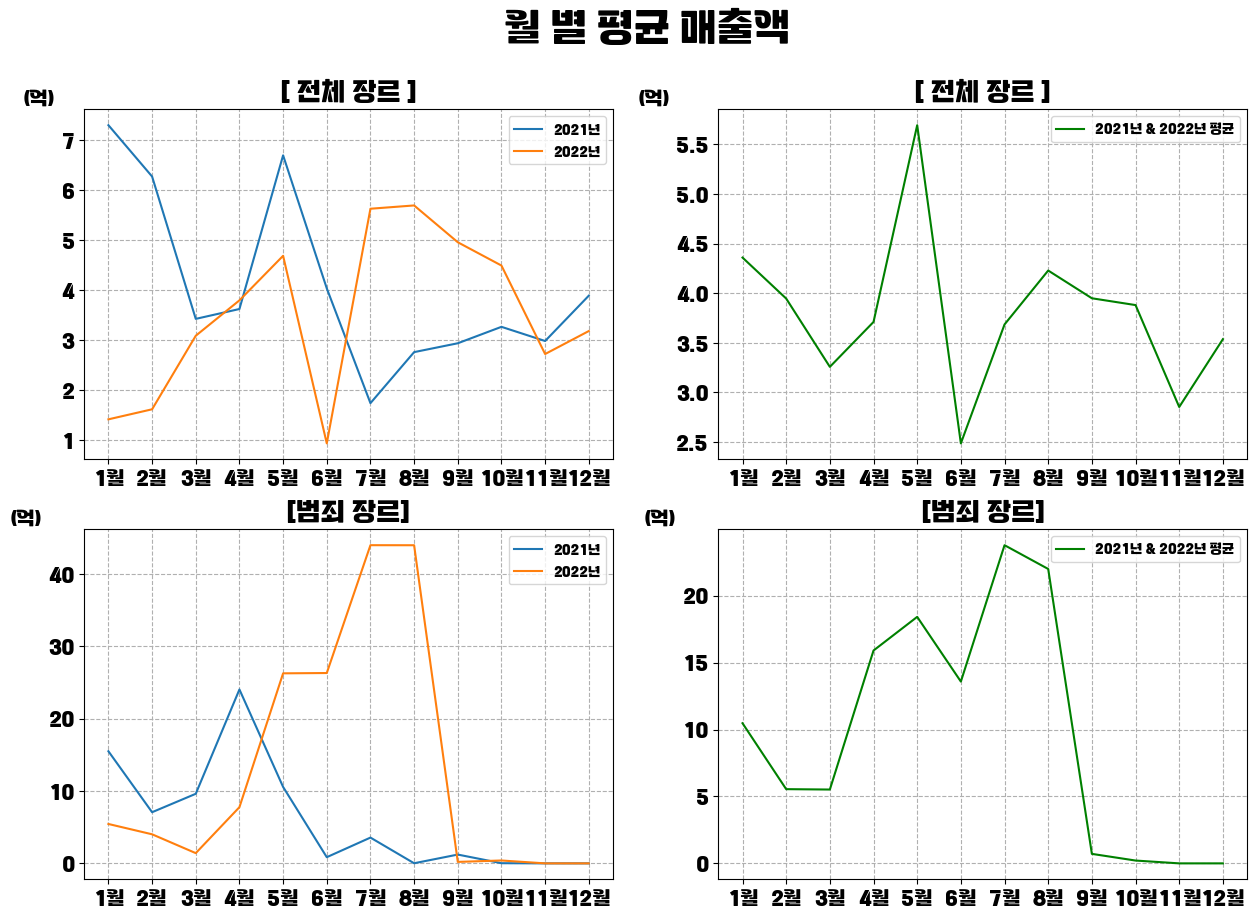

In [115]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('월 별 평균 매출액', fontsize=30)

# [전체 장르]
ax[0,0].plot(list(map(str,mdf_month_2021.index)),mdf_month_2021['누적매출액'])
ax[0,0].plot(list(map(str,mdf_month_2022.index)),mdf_month_2022['누적매출액'])
ax[0,0].legend(labels=['2021년','2022년'], fontsize=10)
ax[0,0].set_title('[ 전체 장르 ]', fontsize=20)
ax[0,0].grid(True, linestyle='--', )
ax[0,0].set_ylabel('(억)',loc='top',rotation=0)

mdf_month_total=(mdf_month_2021['누적매출액'] + mdf_month_2022['누적매출액'])/2
ax[0,1].plot(list(map(str,mdf_month_2021.index)),mdf_month_total, c='g')
ax[0,1].legend(labels=['2021년 & 2022년 평균'], fontsize=10)
ax[0,1].set_title('[ 전체 장르 ]', fontsize=20)
ax[0,1].grid(True, linestyle='--', )
ax[0,1].set_ylabel('(억)',loc='top',rotation=0)

# [범죄 장르]
ax[1,0].plot(list(map(str,mdf_month_crime_2021.index)),mdf_month_crime_2021['누적매출액'])
ax[1,0].plot(list(map(str,mdf_month_crime_2022.index)),mdf_month_crime_2022['누적매출액'])
ax[1,0].legend(labels=['2021년','2022년'], fontsize=10)
ax[1,0].set_title('[범죄 장르]', fontsize=20)
ax[1,0].grid(True, linestyle='--', )
ax[1,0].set_ylabel('(억)',loc='top',rotation=0)

mdf_month_crime_total=(mdf_month_crime_2021['누적매출액'] + mdf_month_crime_2022['누적매출액'])/2
ax[1,1].plot(list(map(str,mdf_month_crime_2021.index)),mdf_month_crime_total, c='g')
ax[1,1].legend(labels=['2021년 & 2022년 평균'], fontsize=10)
ax[1,1].set_title('[범죄 장르]', fontsize=20)
ax[1,1].grid(True, linestyle='--', )
ax[1,1].set_ylabel('(억)',loc='top',rotation=0)

fig.savefig('a.png',transparent=True)

#### 전체 장르
- 21년 1월 2월 -> 신과함께, 라라랜드로 인한 매출액 상승 (이벤트성)
- 전체 트렌드 분석 시 5월, 8월, 9월에 평균적으로 높은 매출액을 기록하는 것으로 확인 
    - 5월 가정의 달, 8월 여름 시즌, 9월 추석으로 인한 영향이 있을 것으로 추청
#### 범죄 장르
- 전체 장르에서는 5월 평균 매출액이 가장 높은 반면에 범죄 장르에서는 7~8월의 여름 시즌 매출액이 높은 것으로 확인
- 이는 범죄 장르의 특성 상 관람 타겟층에서 초등생은 제외되며, 더운 여름날 통쾌한 권선징악을 바라는 관람객들의 니즈가 반영된 것으로 추정


---
## 월 / 장르 별 매출액 평균
---

In [94]:
mdf_genre=mdf.groupby(['분석월','장르']).mean()
mdf_genre_sale=mdf_genre['누적매출액']
mdf_genre_sale

C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_9496\3956529207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mdf_genre=mdf.groupby(['분석월','장르']).mean()


분석월     장르    
202101  공연         1.288754
        다큐멘터리      0.205887
        드라마        3.982581
        멜로/로맨스     1.161455
        미스터리       4.753427
                    ...    
202212  애니메이션      1.595742
        액션        20.217797
        어드벤처       0.000690
        코미디        4.859787
        판타지        0.000050
Name: 누적매출액, Length: 326, dtype: float64

In [95]:
genreList=list(mdf.장르.unique())
genreList.sort()
month=list(mdf_month.index)

multi_idx_list=[]
for a in month :
    for b in genreList:
        multi_idx_list.append((a,b))


idx_=[]

for a in multi_idx_list:
    if a not in list(mdf_genre_sale.index) : idx_.append(a)

for a in idx_ : 
    mdf_genre_sale[a]=0

mdf_genre_sale=mdf_genre_sale.sort_index()
mdf_genre_sale

분석월     장르    
202101  SF         0.000000
        가족         0.000000
        공연         1.288754
        공포(호러)     0.000000
        기타         0.000000
                    ...    
202212  액션        20.217797
        어드벤처       0.000690
        전쟁         0.000000
        코미디        4.859787
        판타지        0.000050
Name: 누적매출액, Length: 456, dtype: float64

In [96]:
mdf_genre_2021=mdf_genre_sale.loc['202101':'202112']
mdf_genre_2021=pd.DataFrame(mdf_genre_2021)
mdf_genre_2021.reset_index(inplace=True)

mdf_genre_2022=mdf_genre_sale['202201':'202212']
mdf_genre_2022=pd.DataFrame(mdf_genre_2022)
mdf_genre_2022.reset_index(inplace=True)

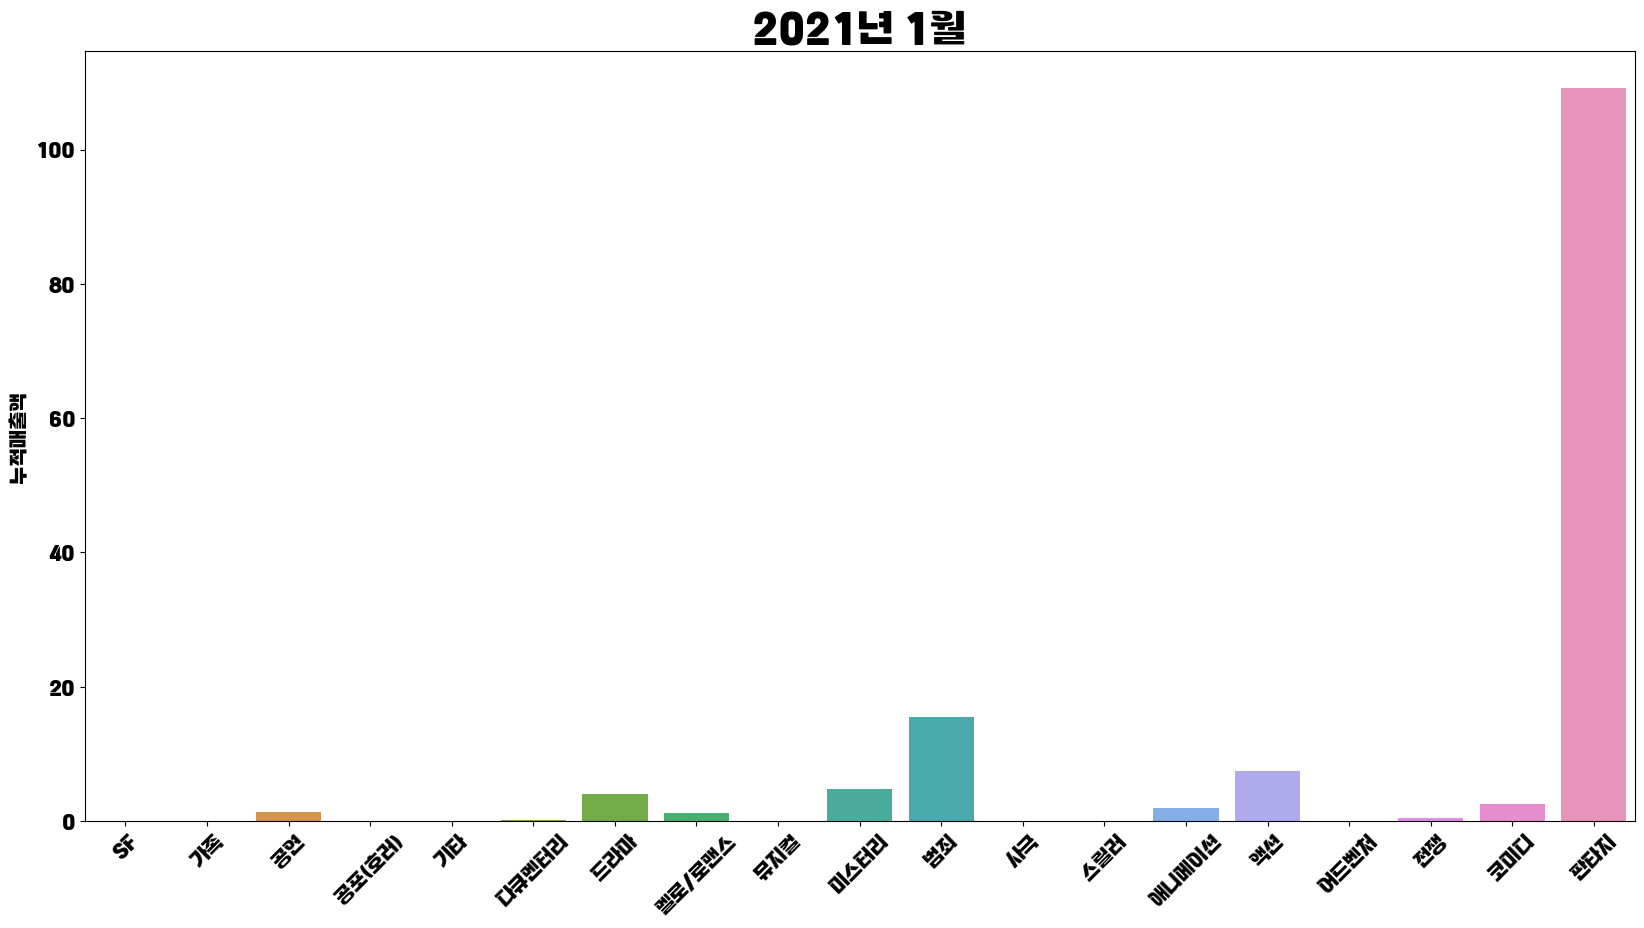

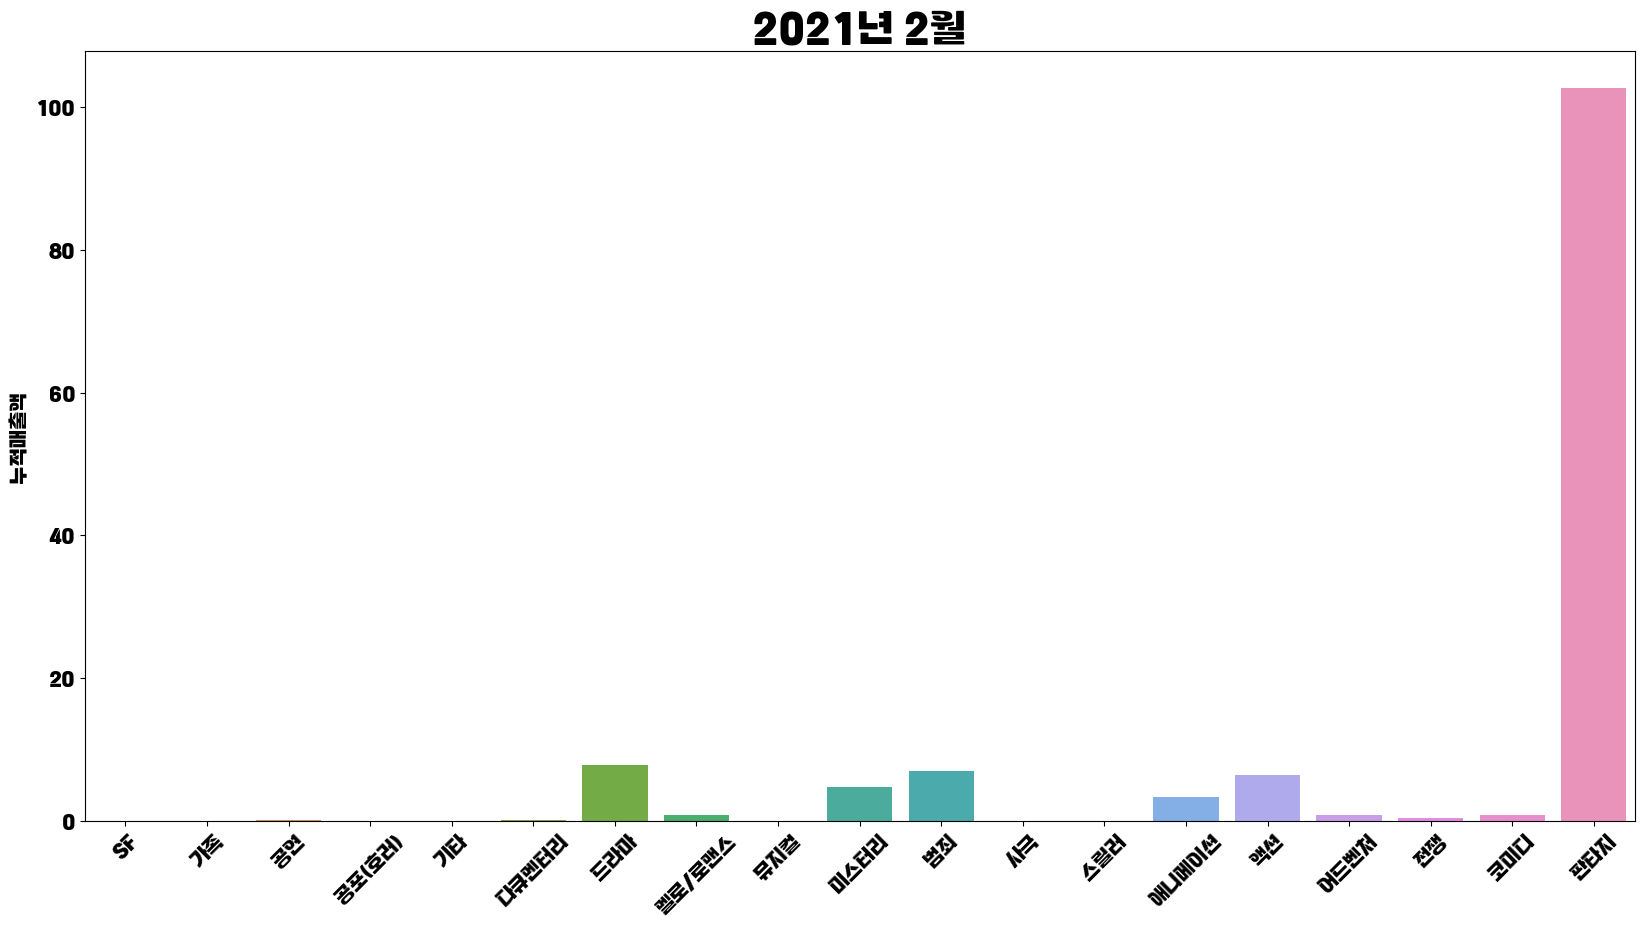

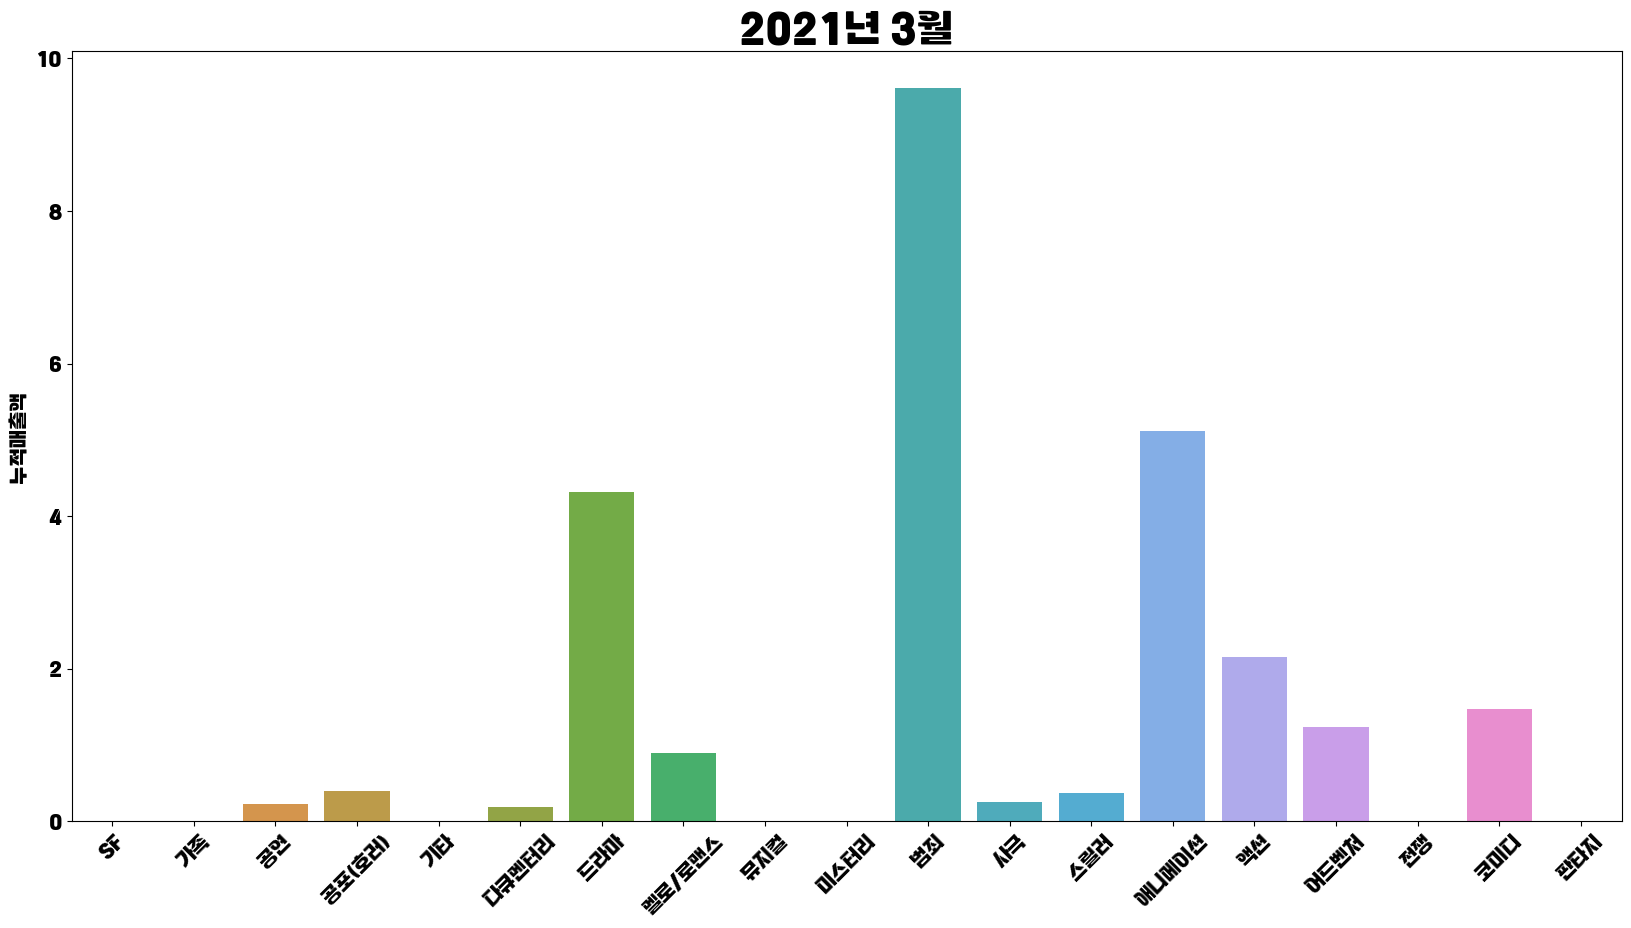

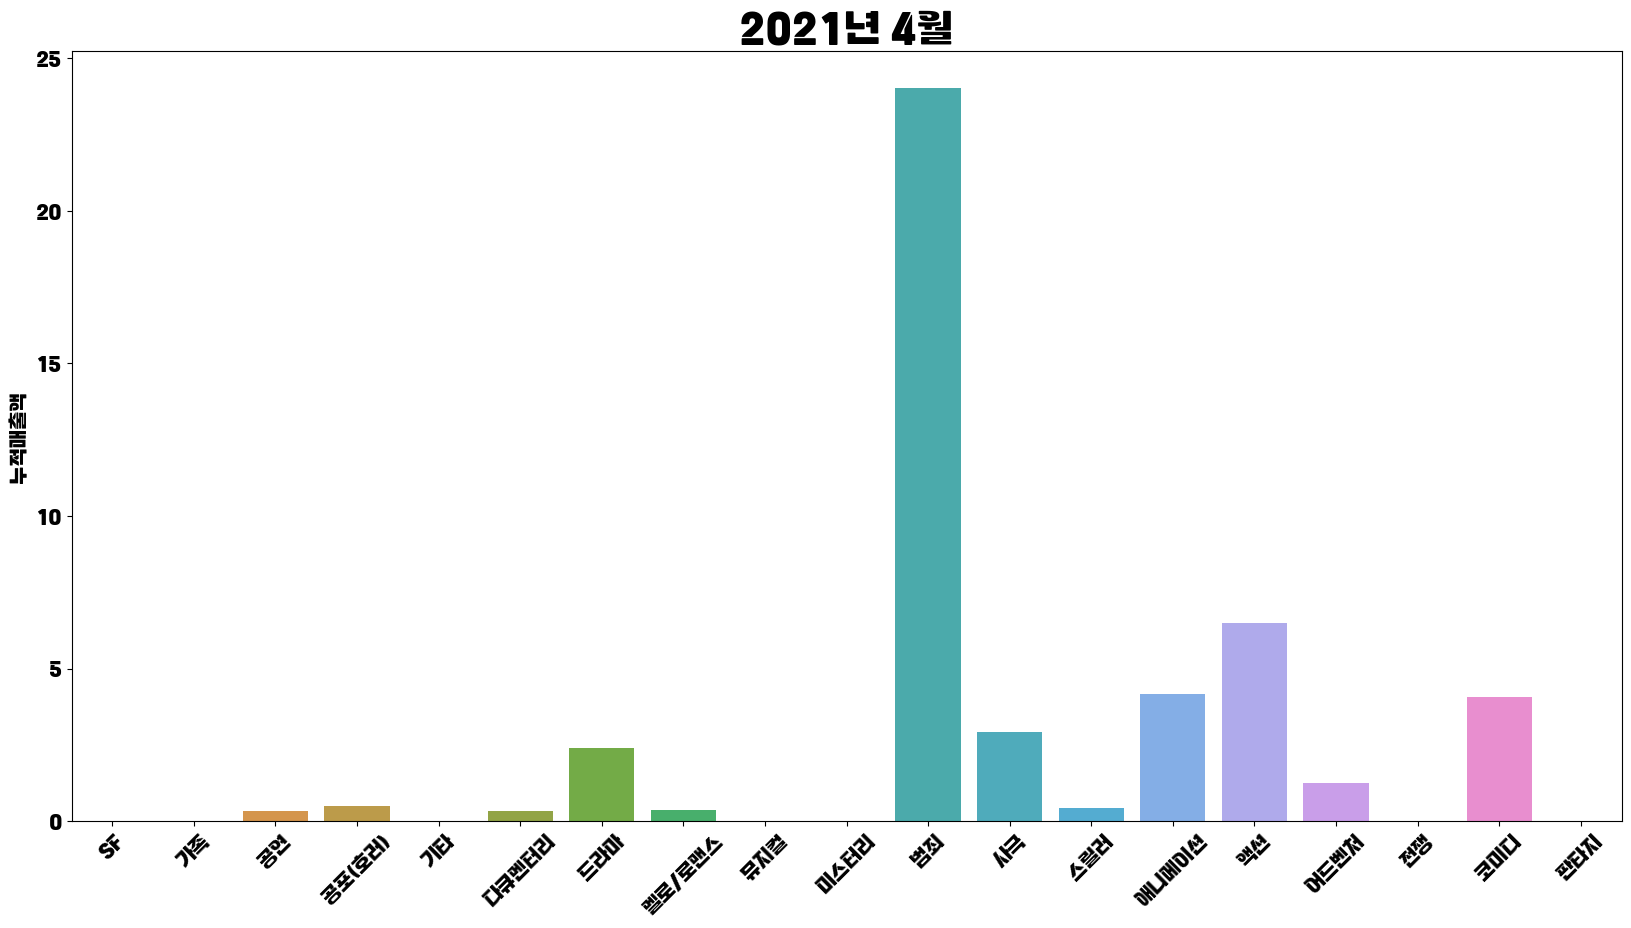

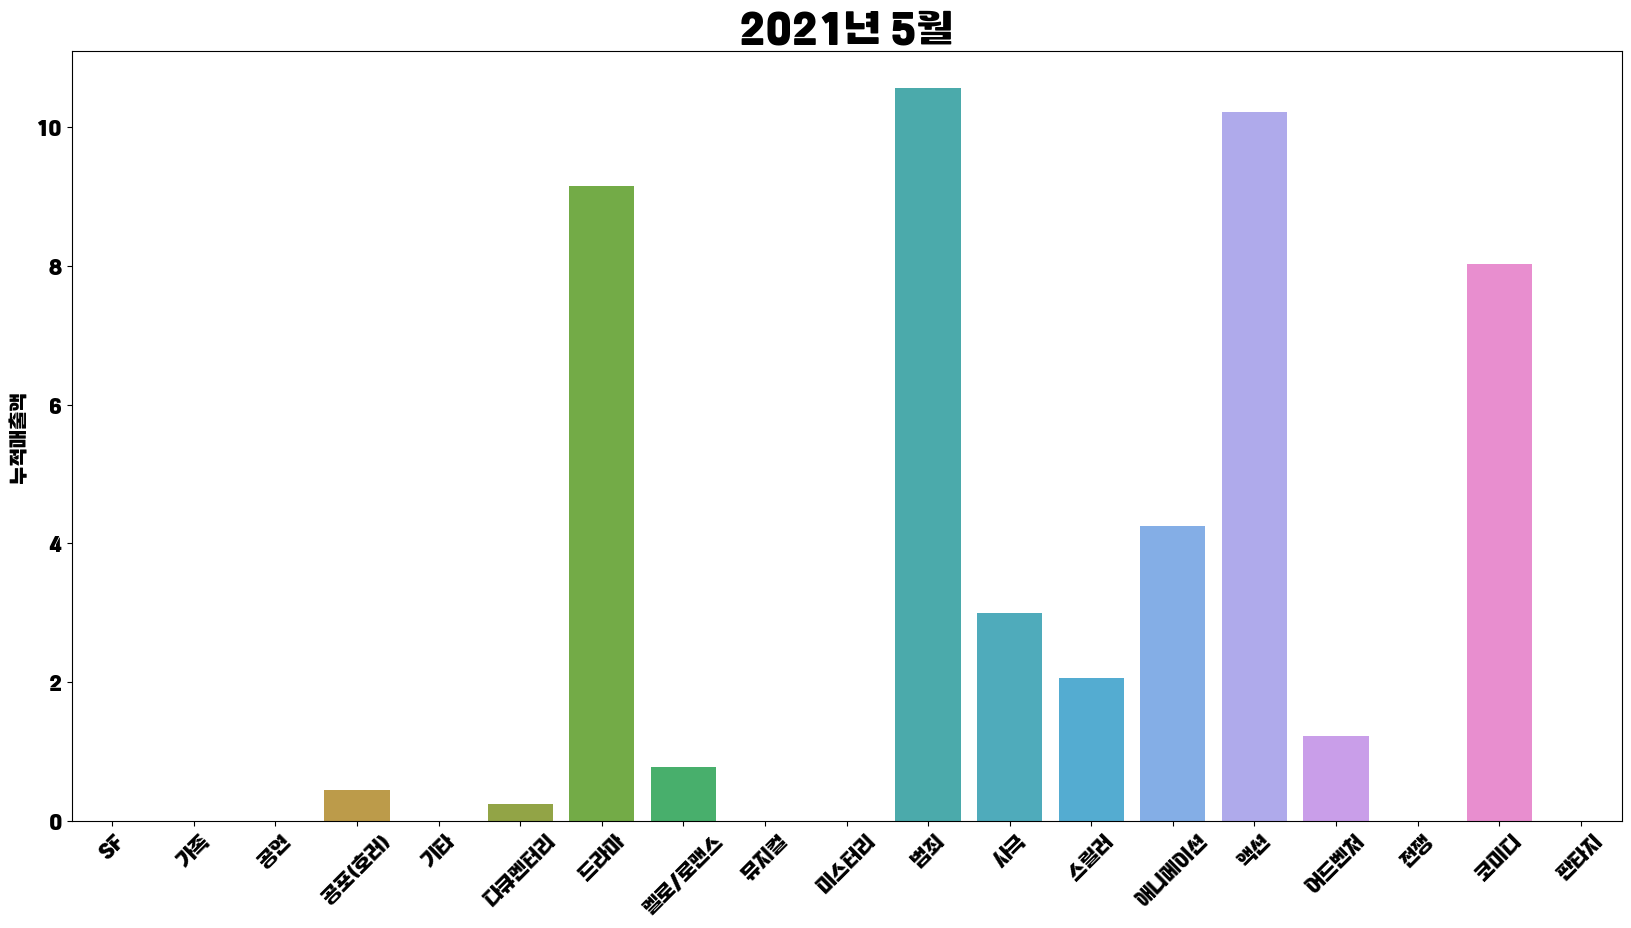

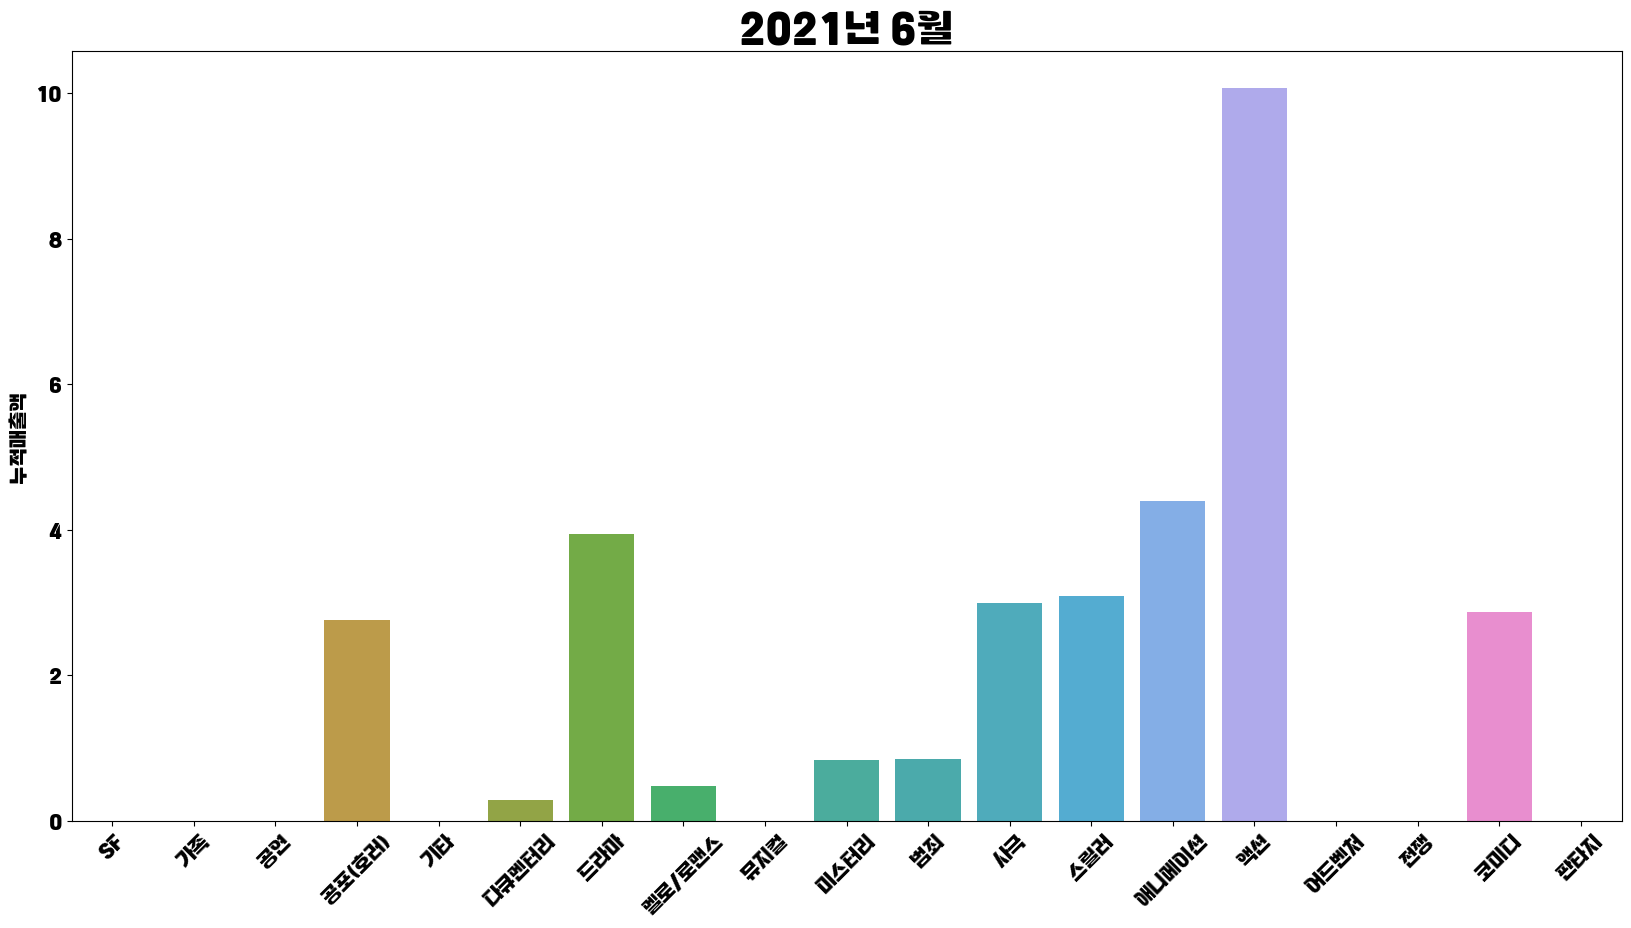

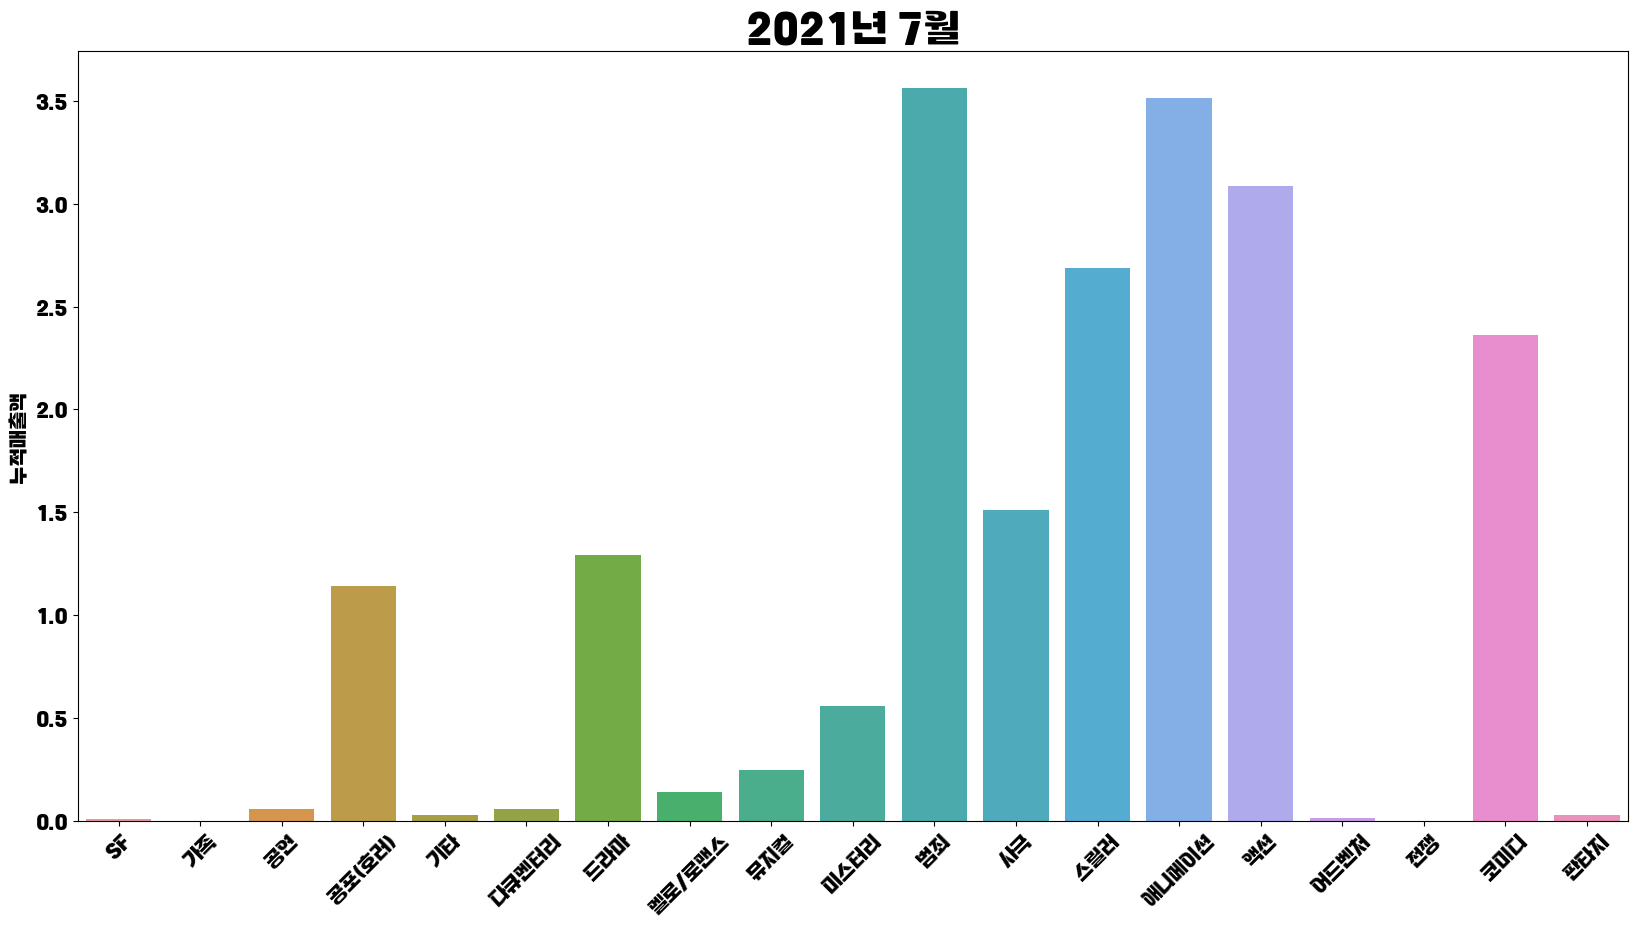

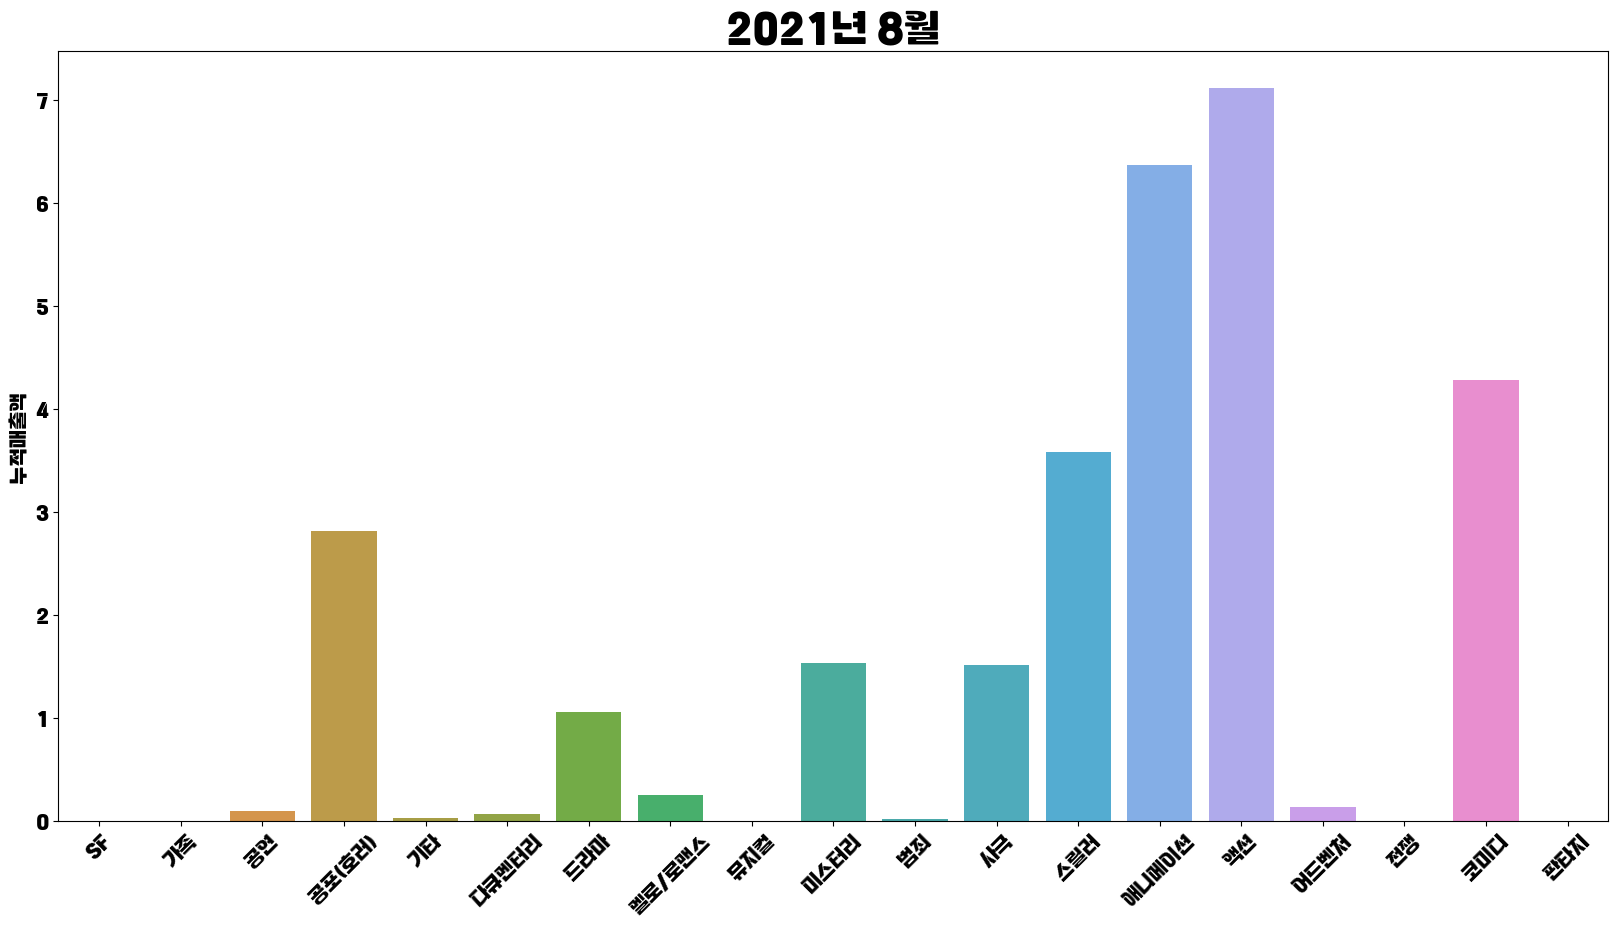

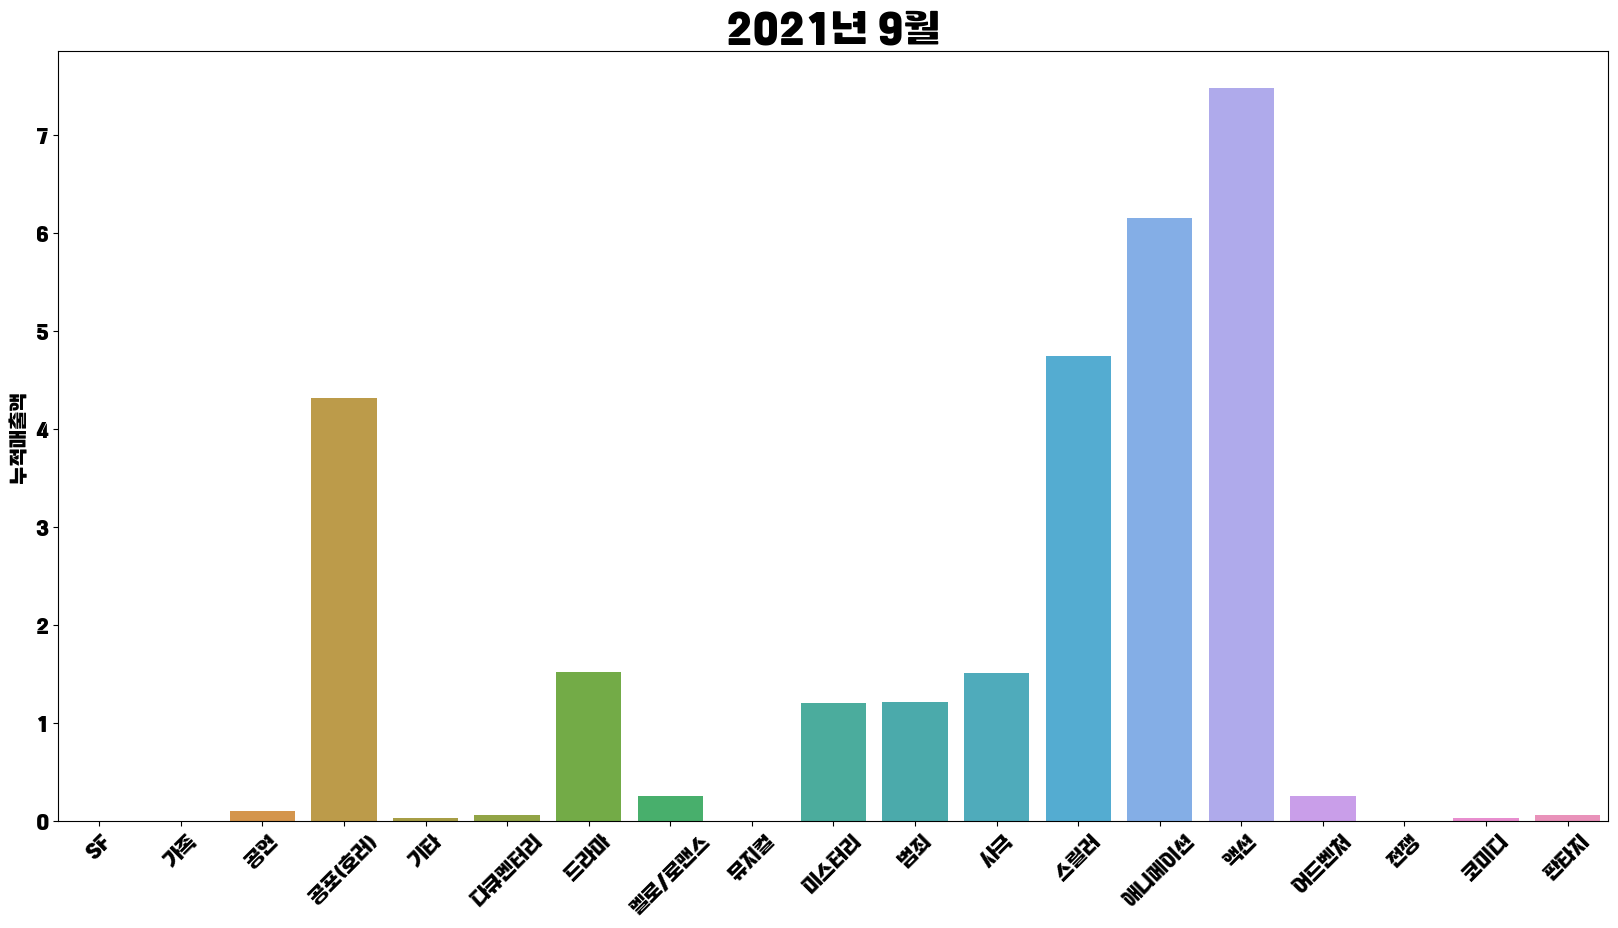

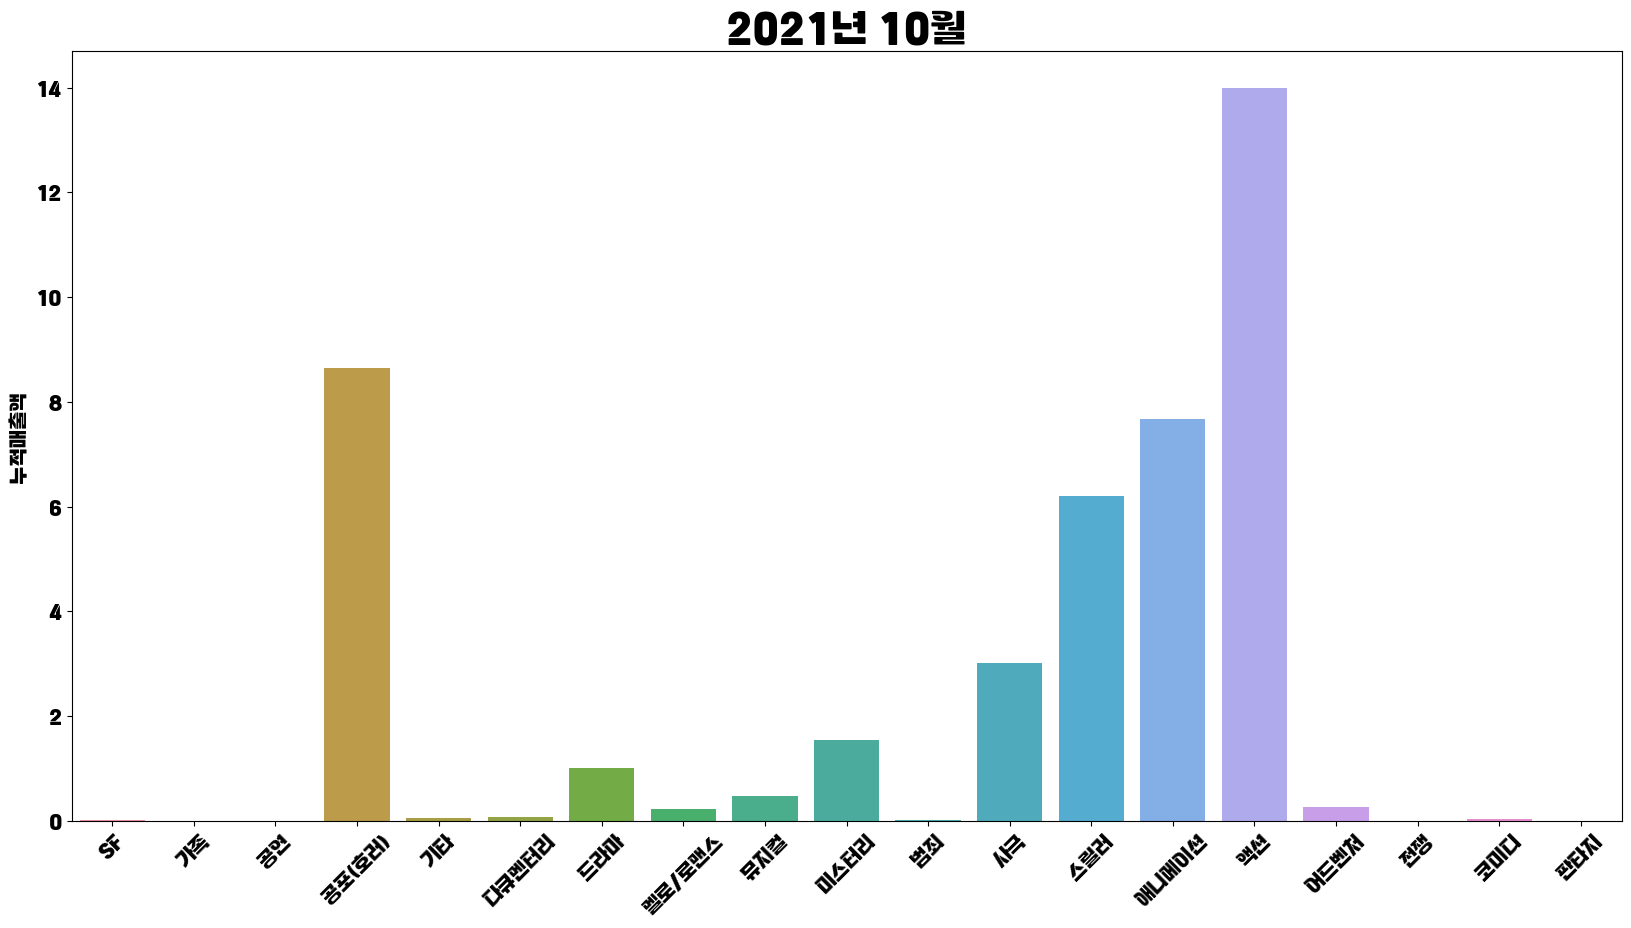

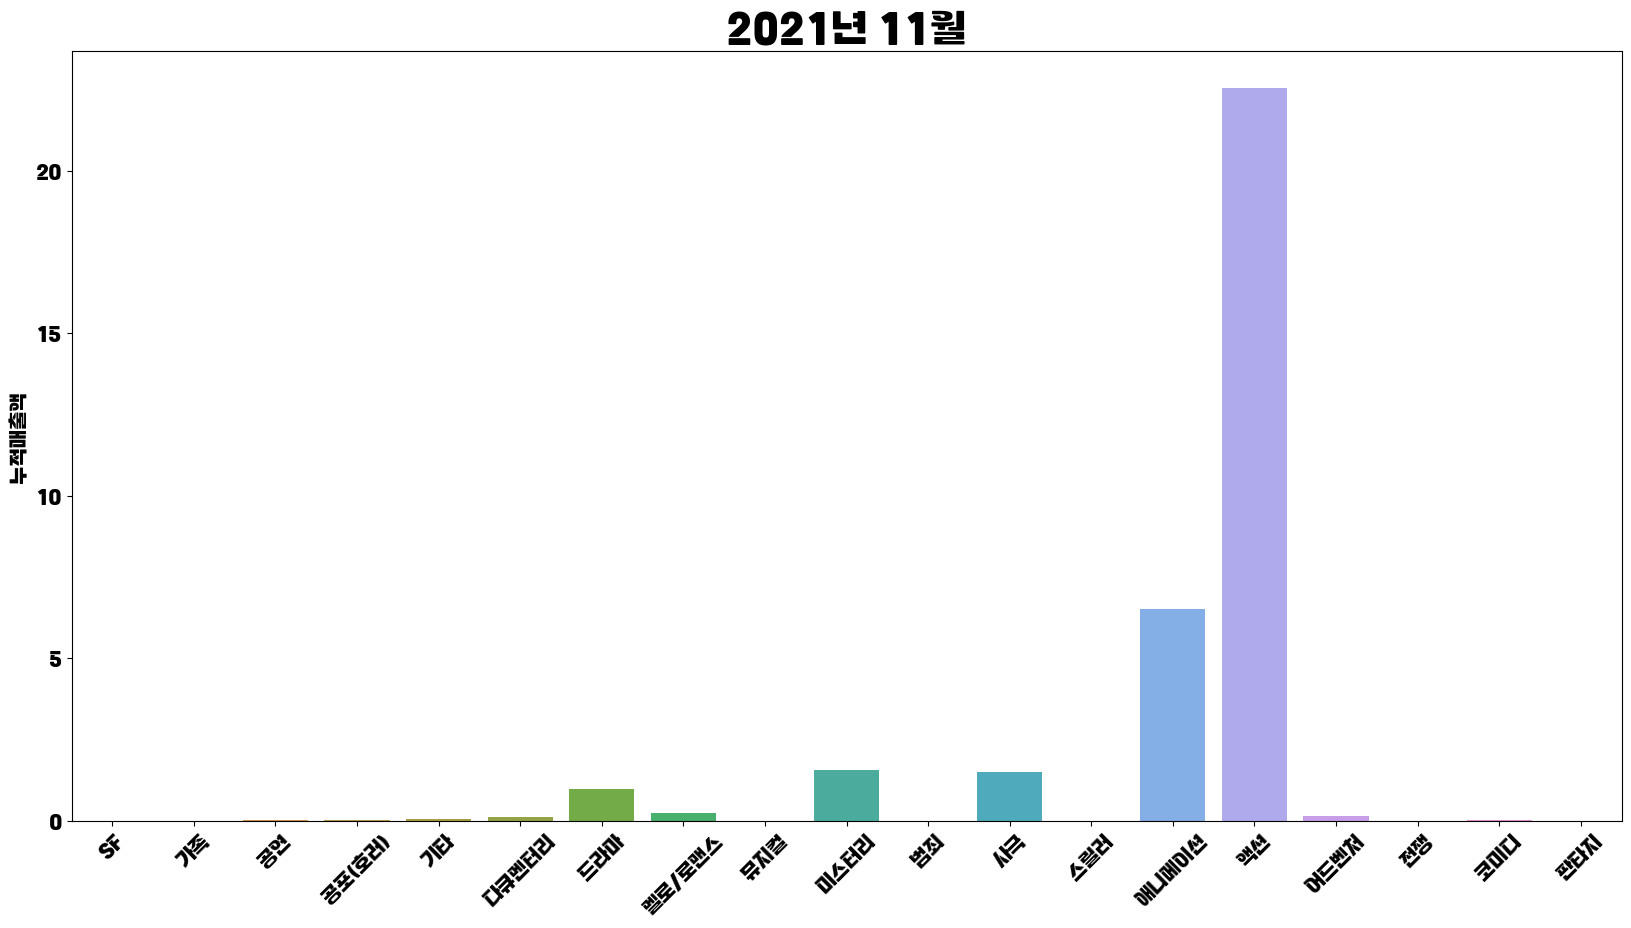

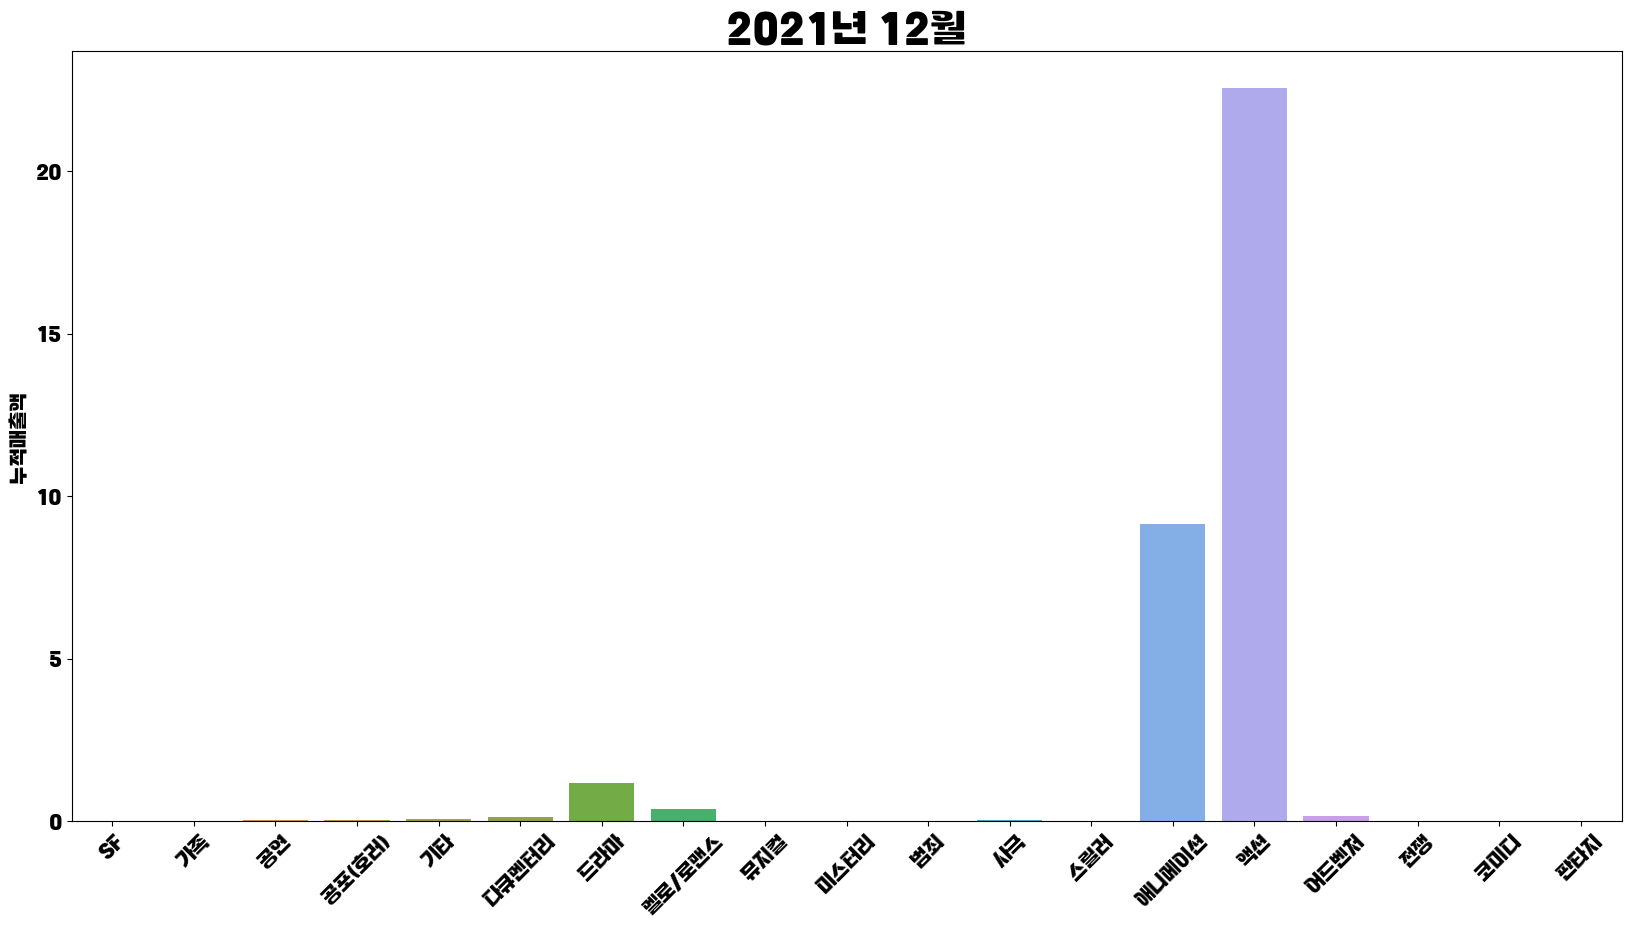

In [136]:
month=[]
for a in range(12) : month.append(str(a+1)+'월')

for i in range(12):
    fig=plt.figure(figsize=(20,10))
    ax1=fig.add_subplot(1,1,1)
    sns.barplot(x=genreList,y=mdf_genre_2021['누적매출액'][i*19:(i+1)*19],data=mdf_genre_2021)
    ax1.set_title('2021년 '+month[i],size=30)
    ax1.set_xticklabels(genreList,rotation=45)
    fig.savefig('2021년 '+month[i]+'.png')

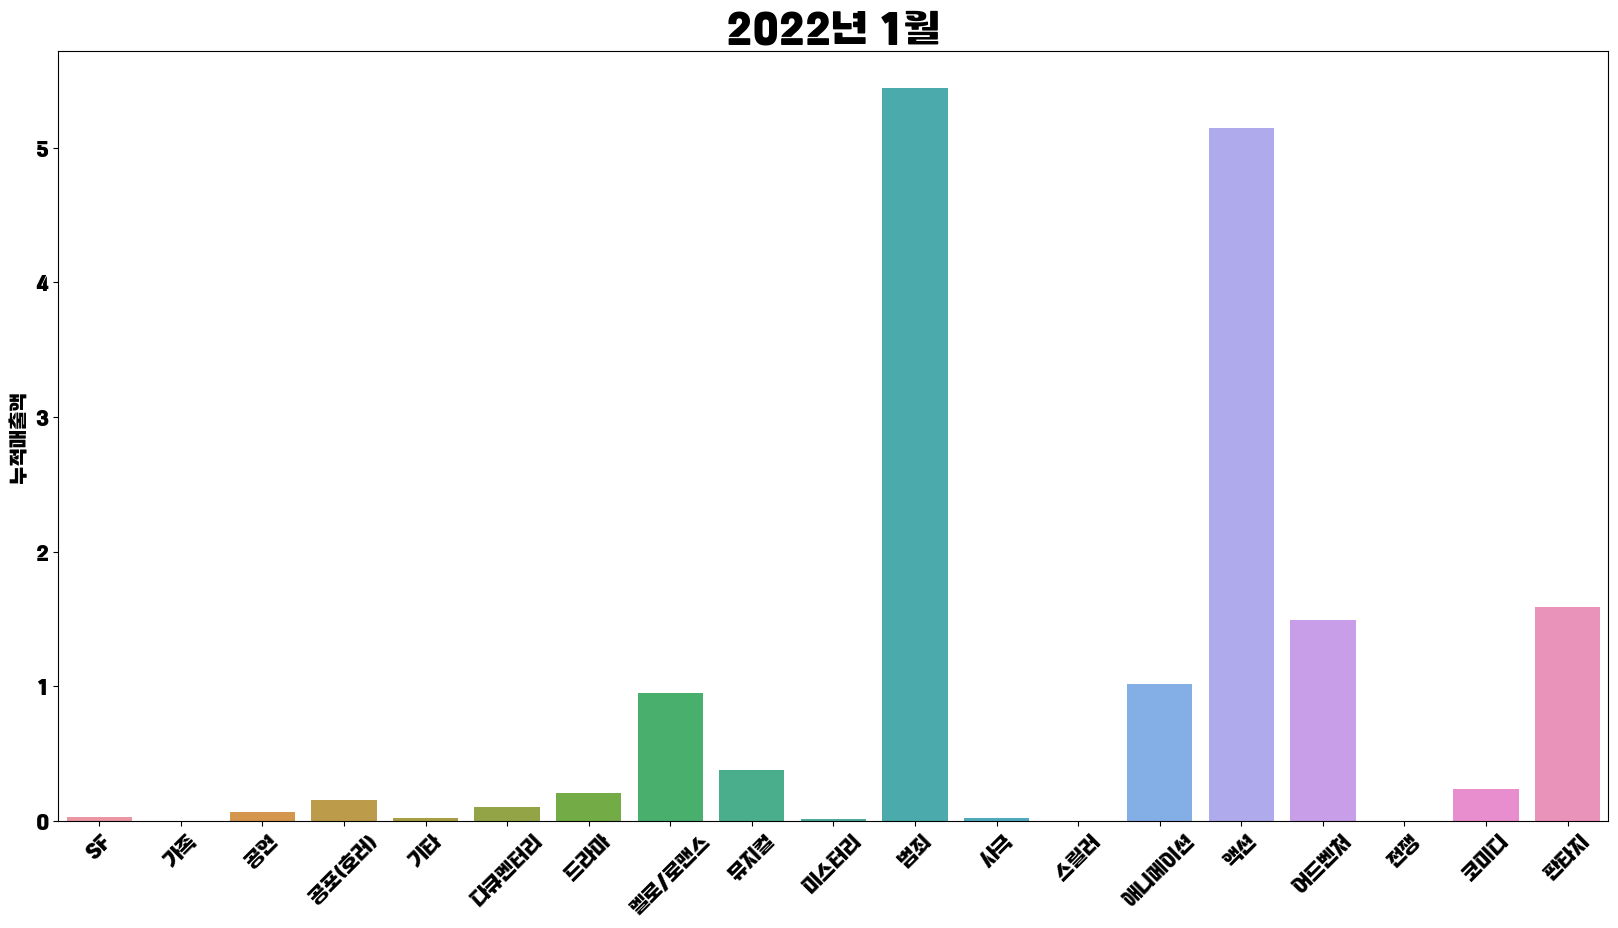

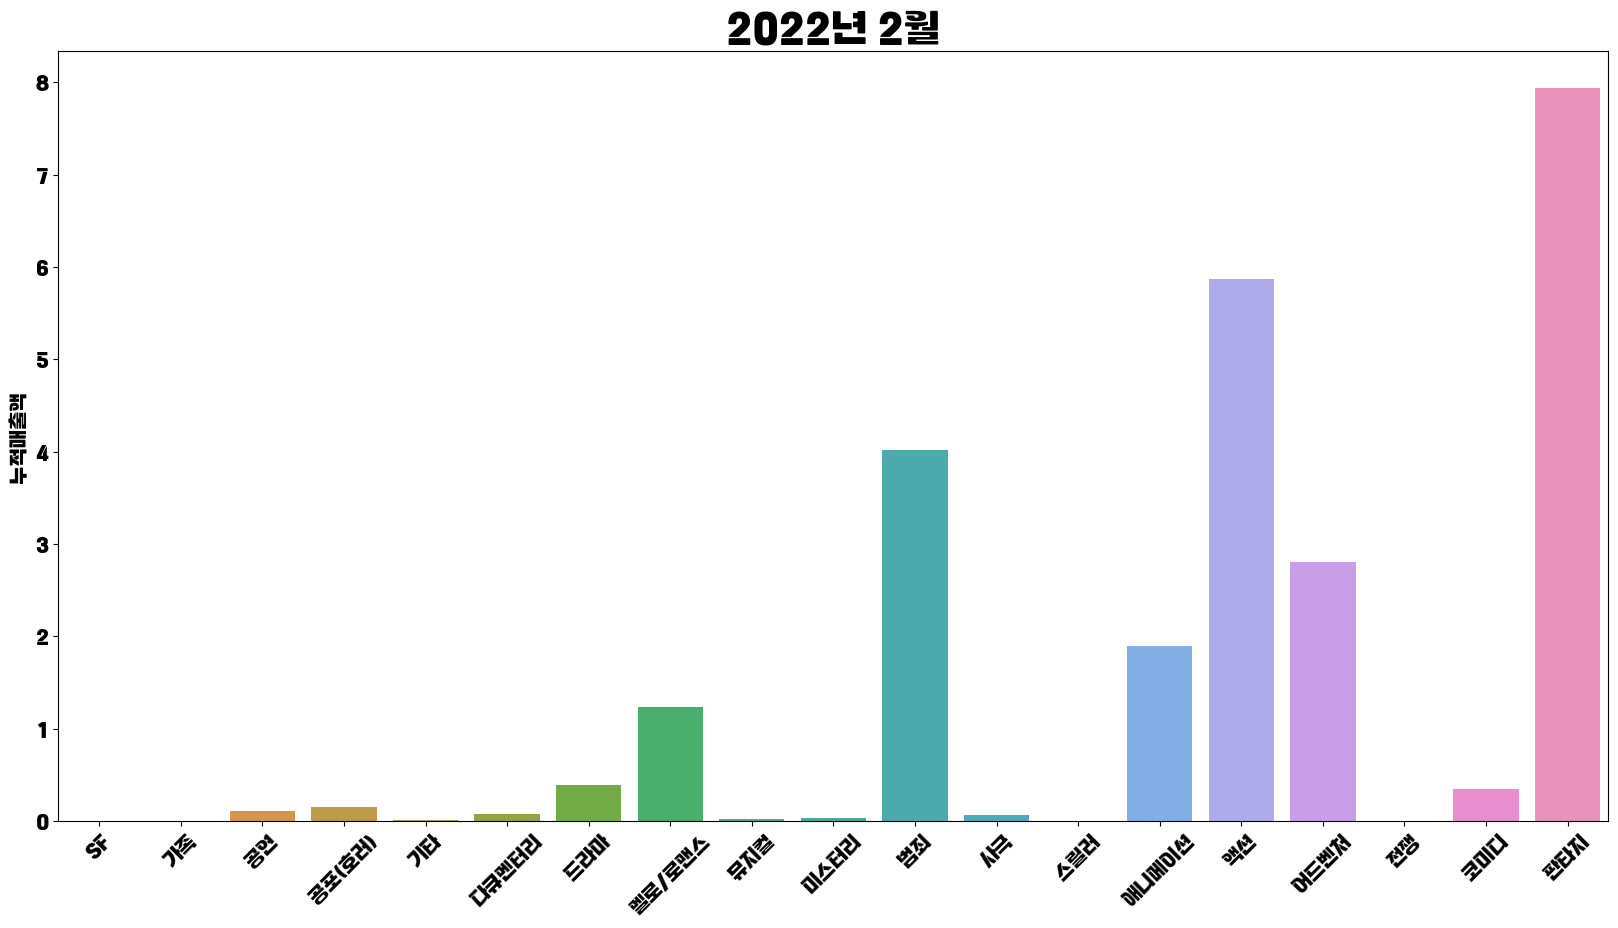

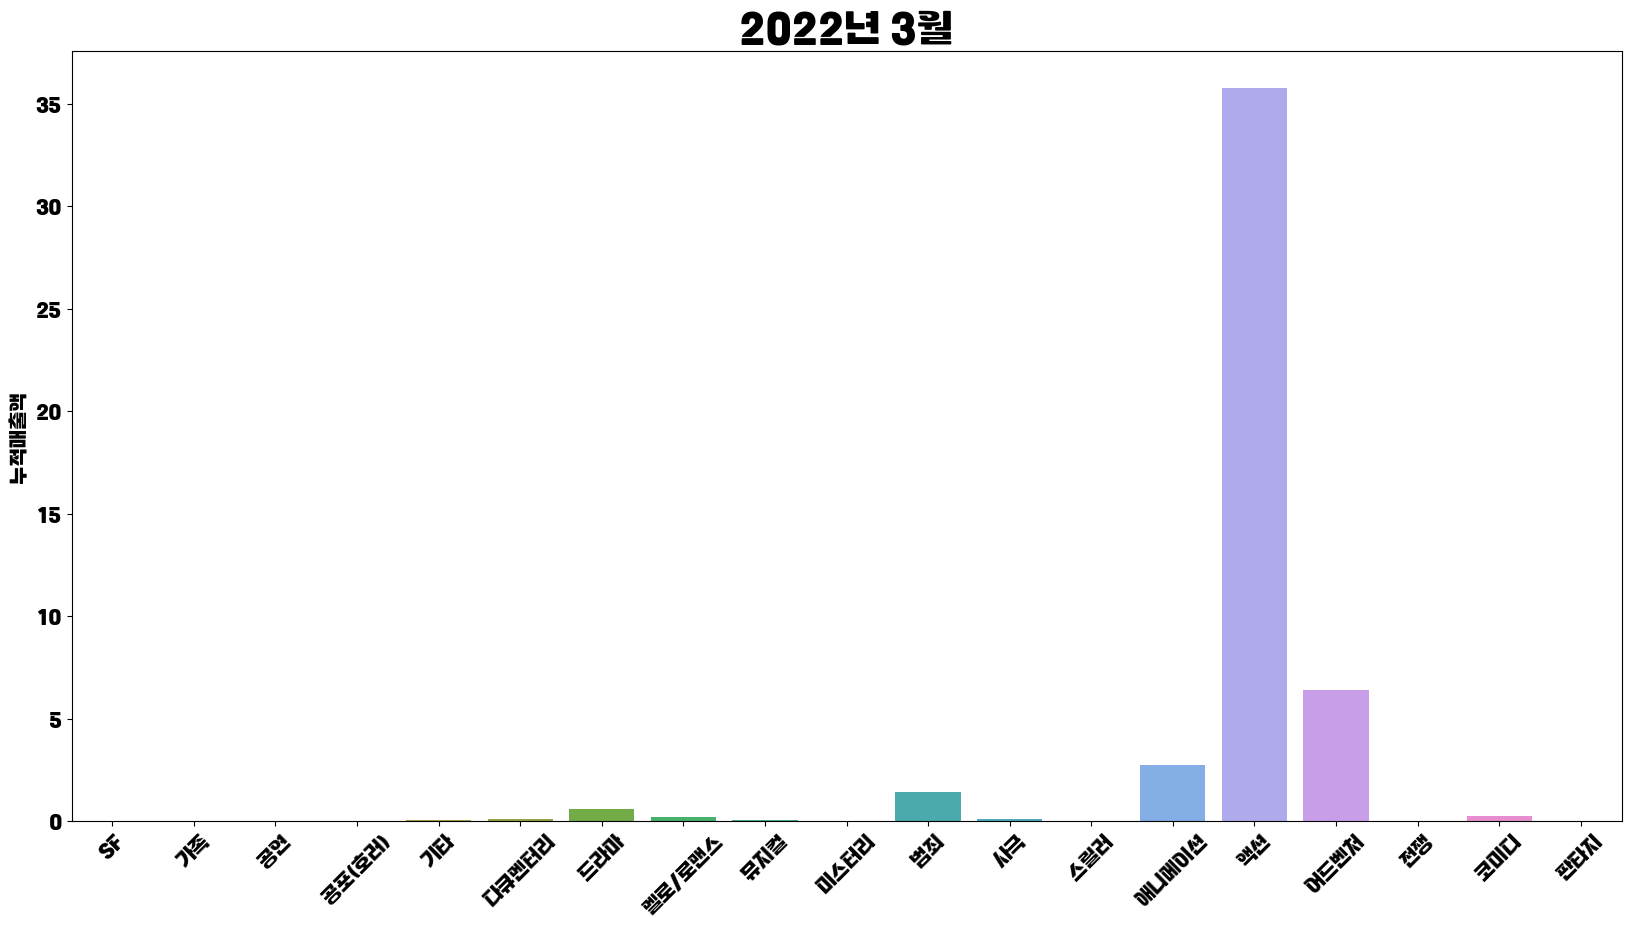

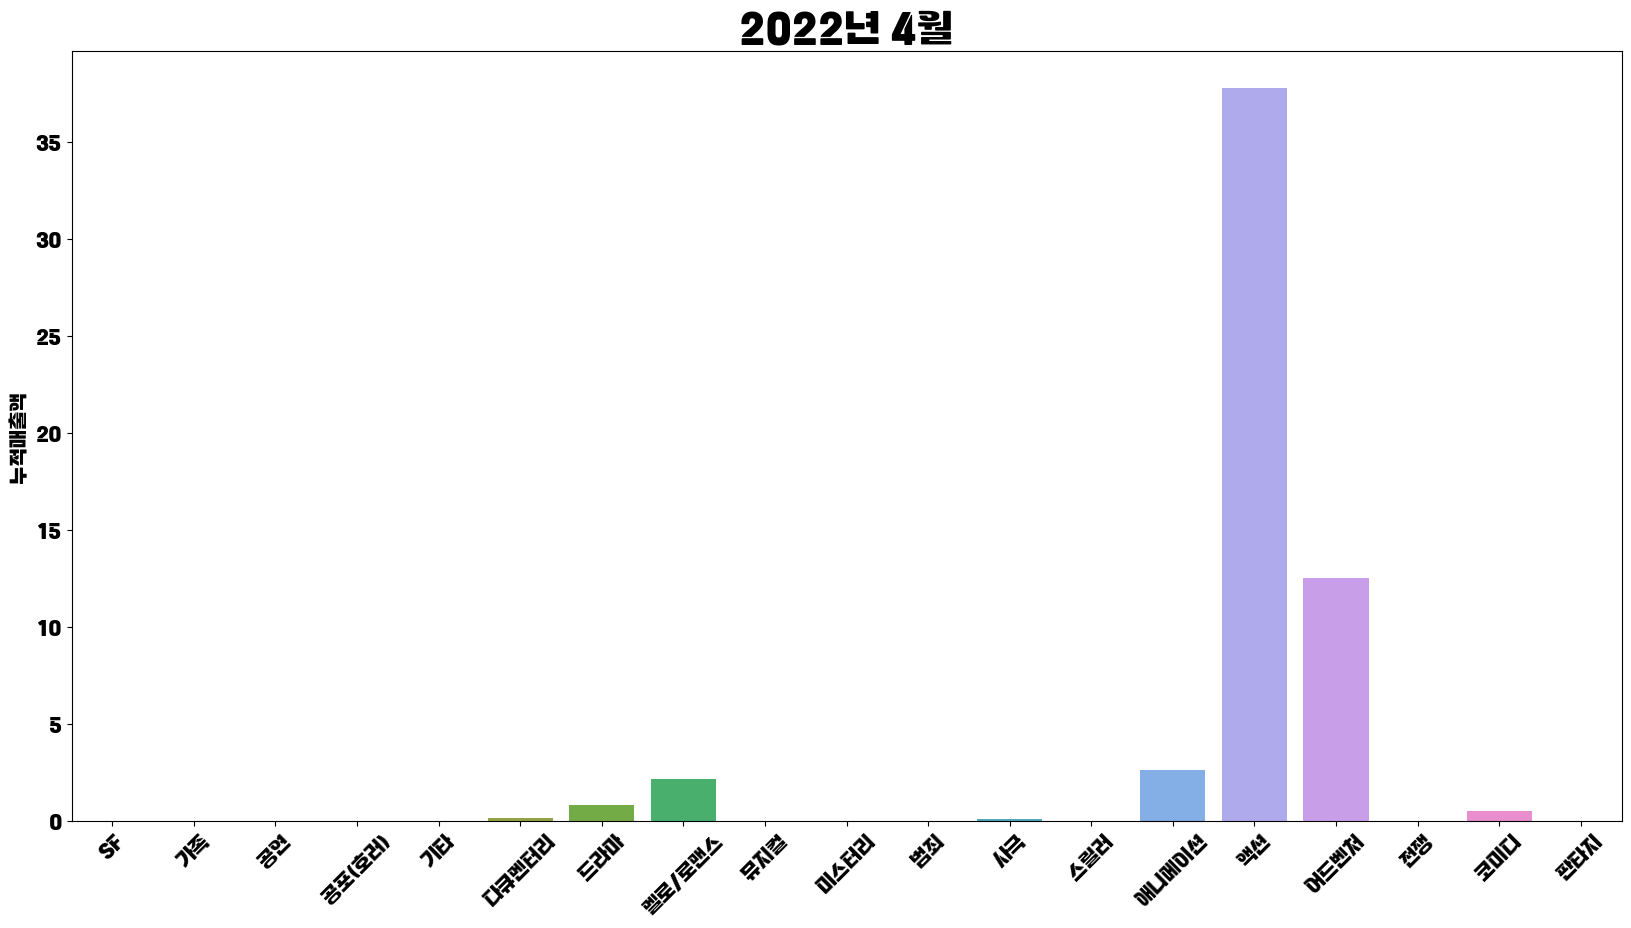

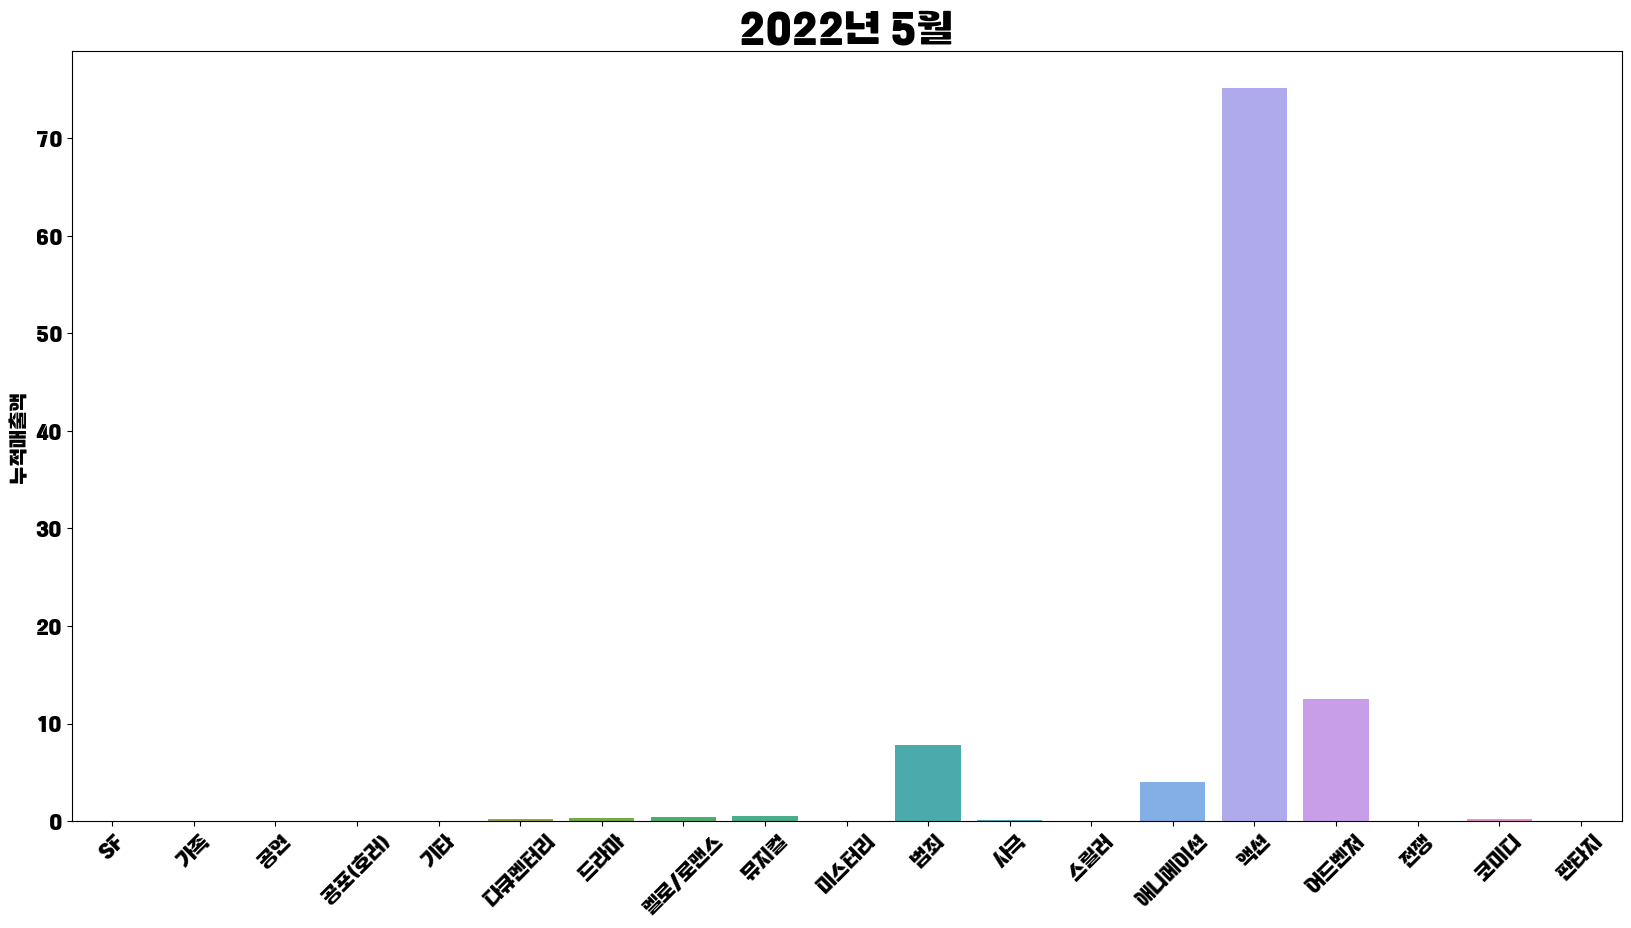

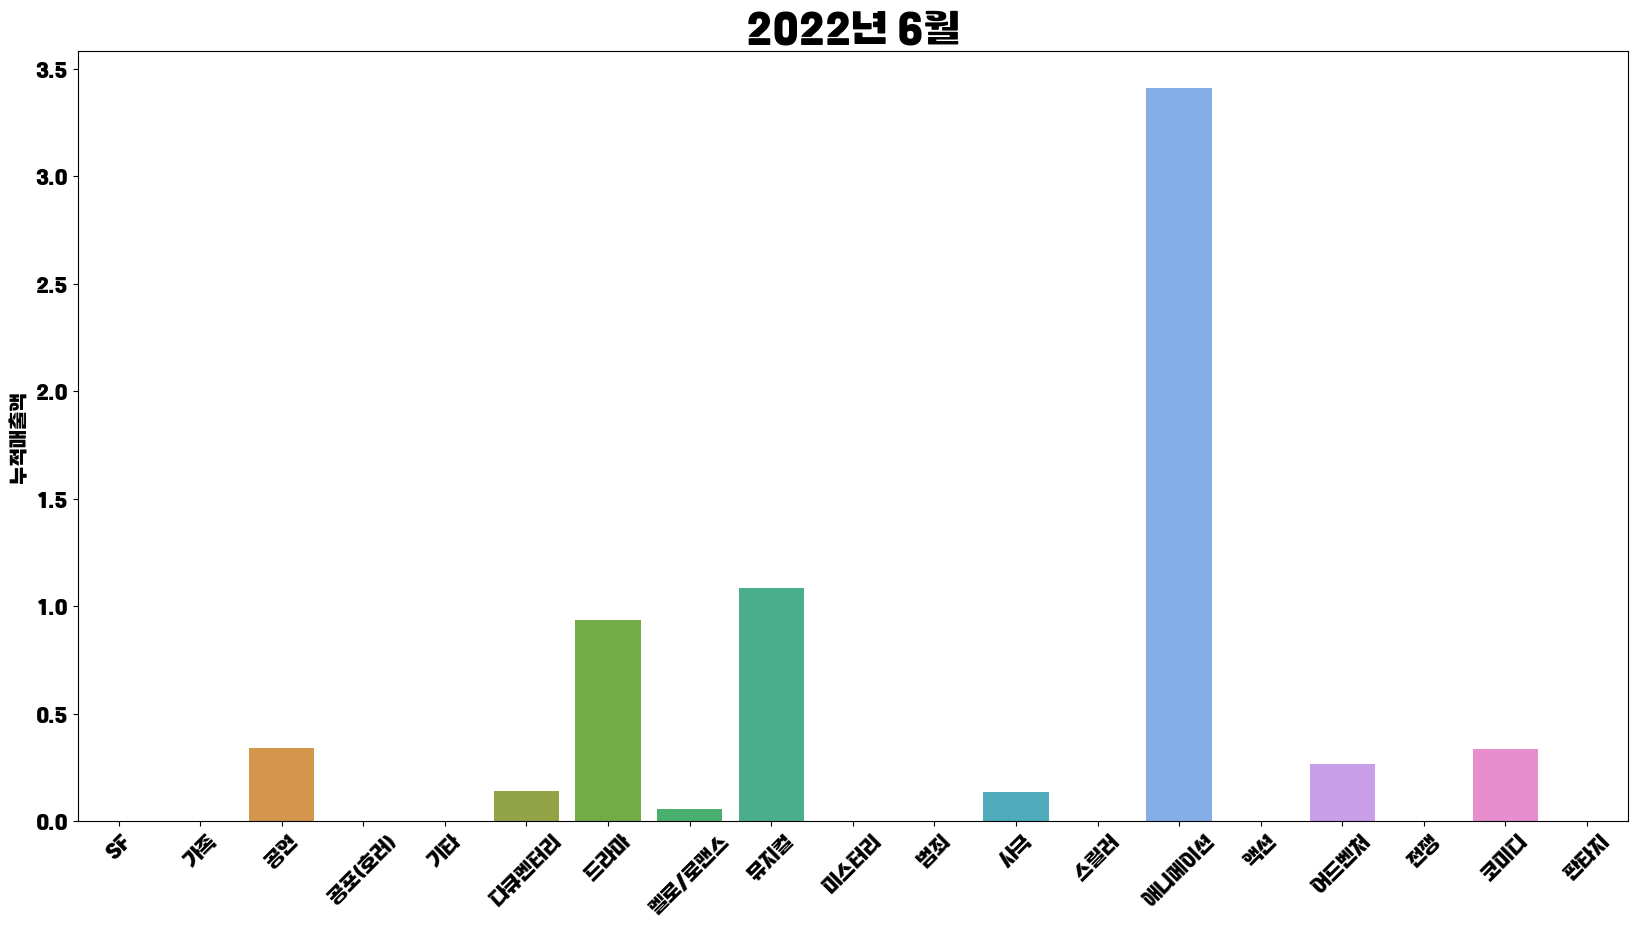

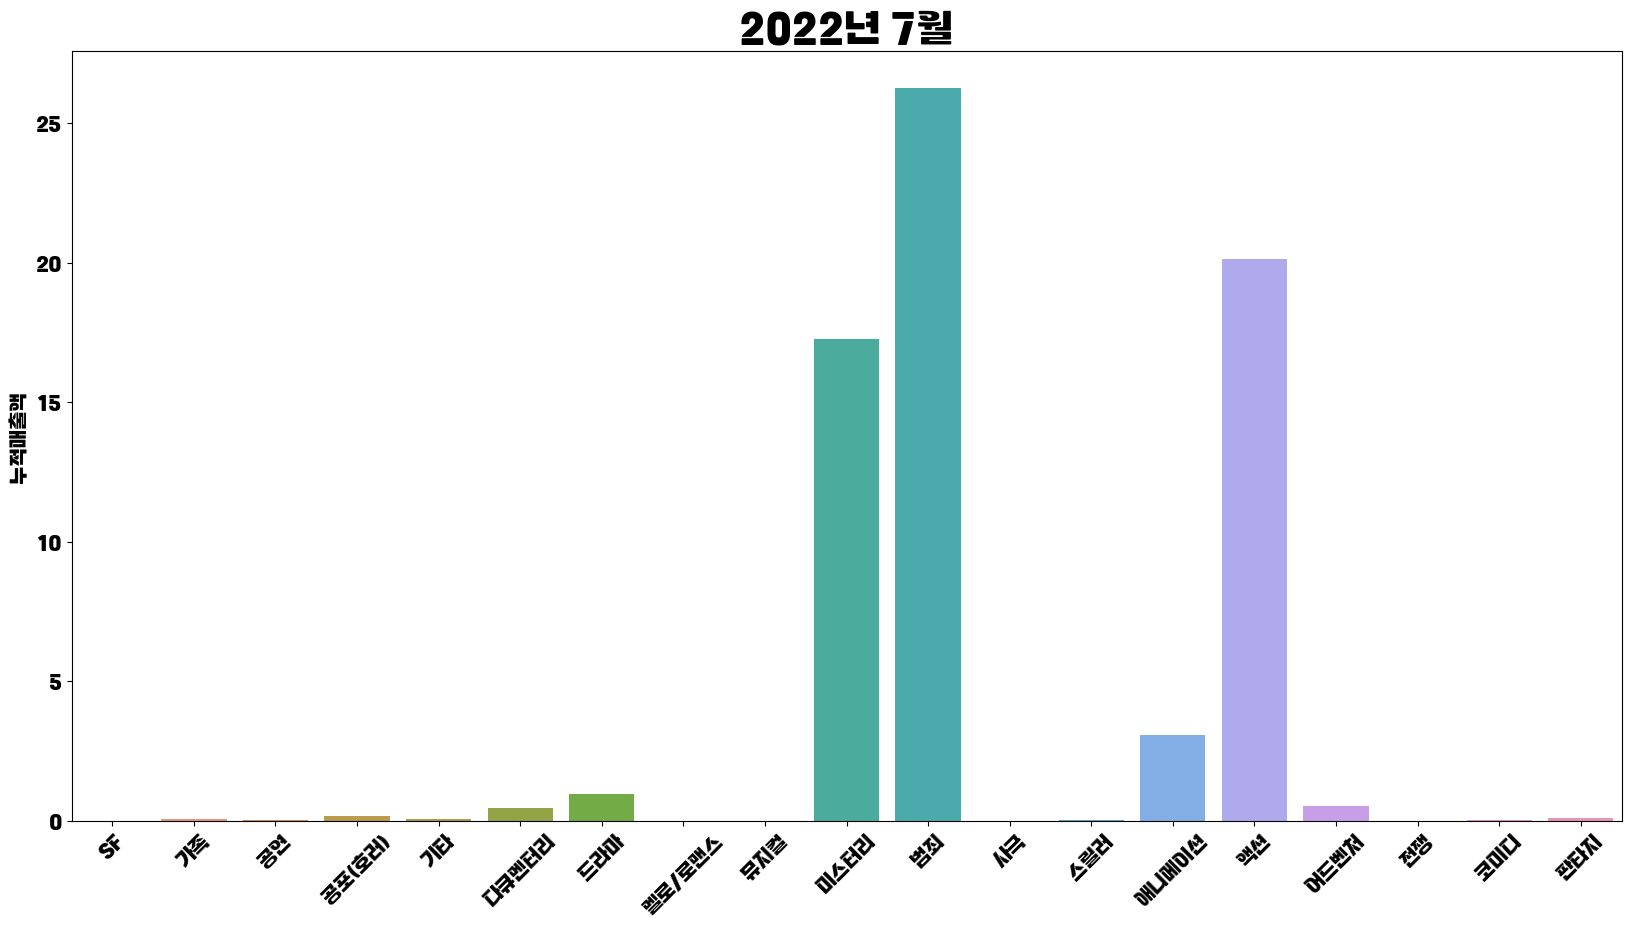

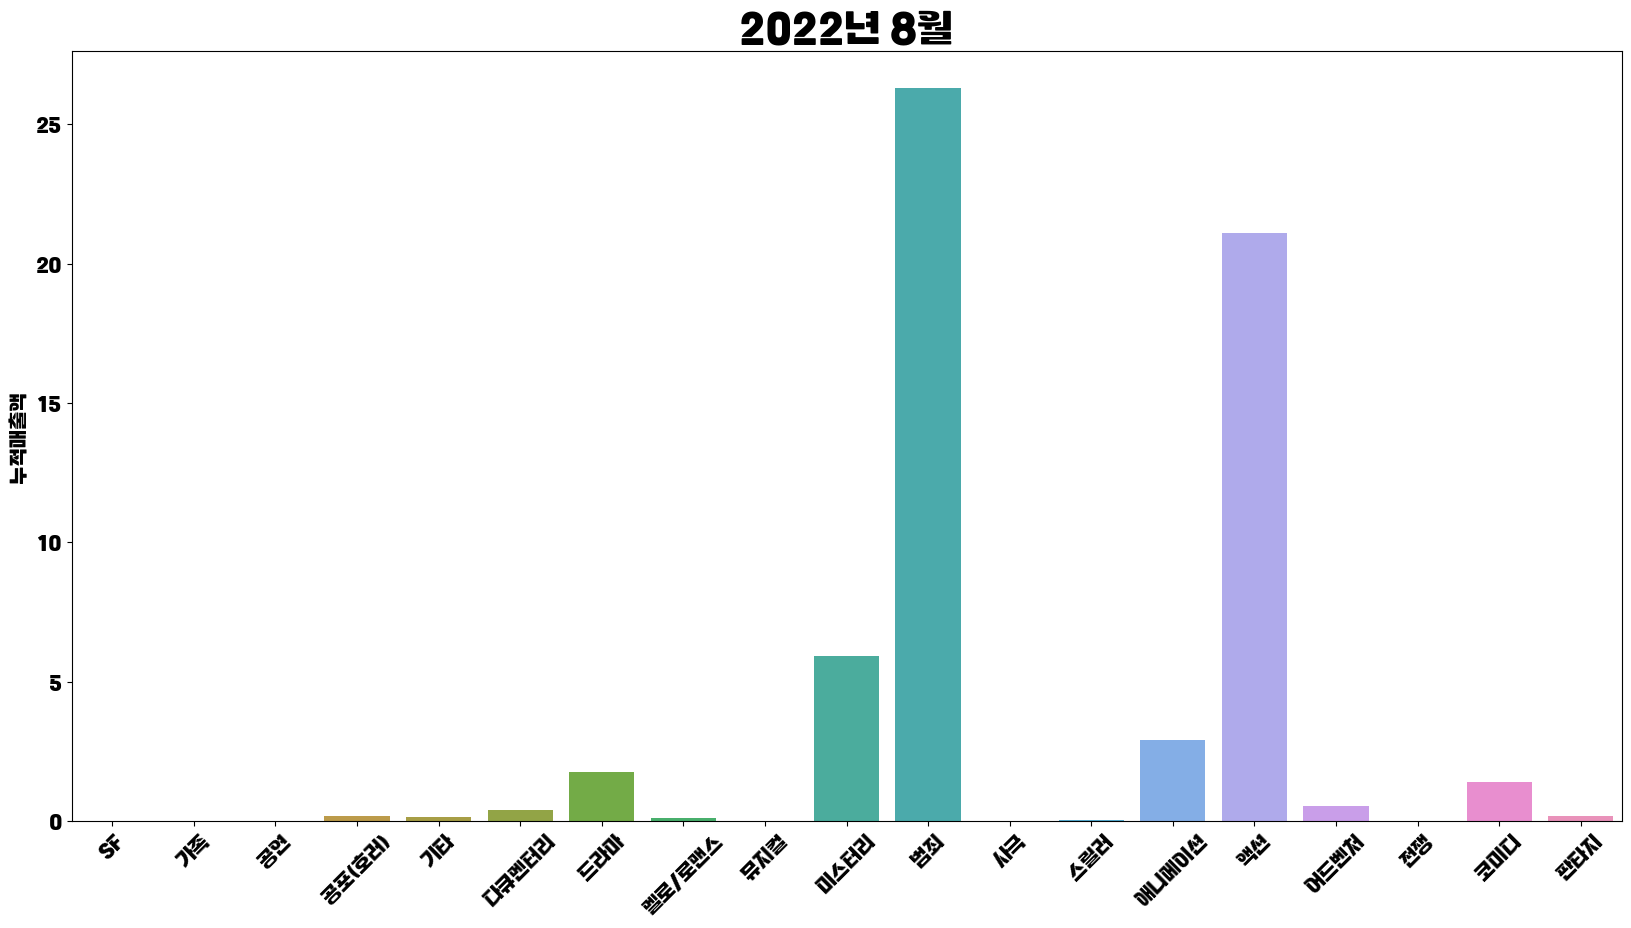

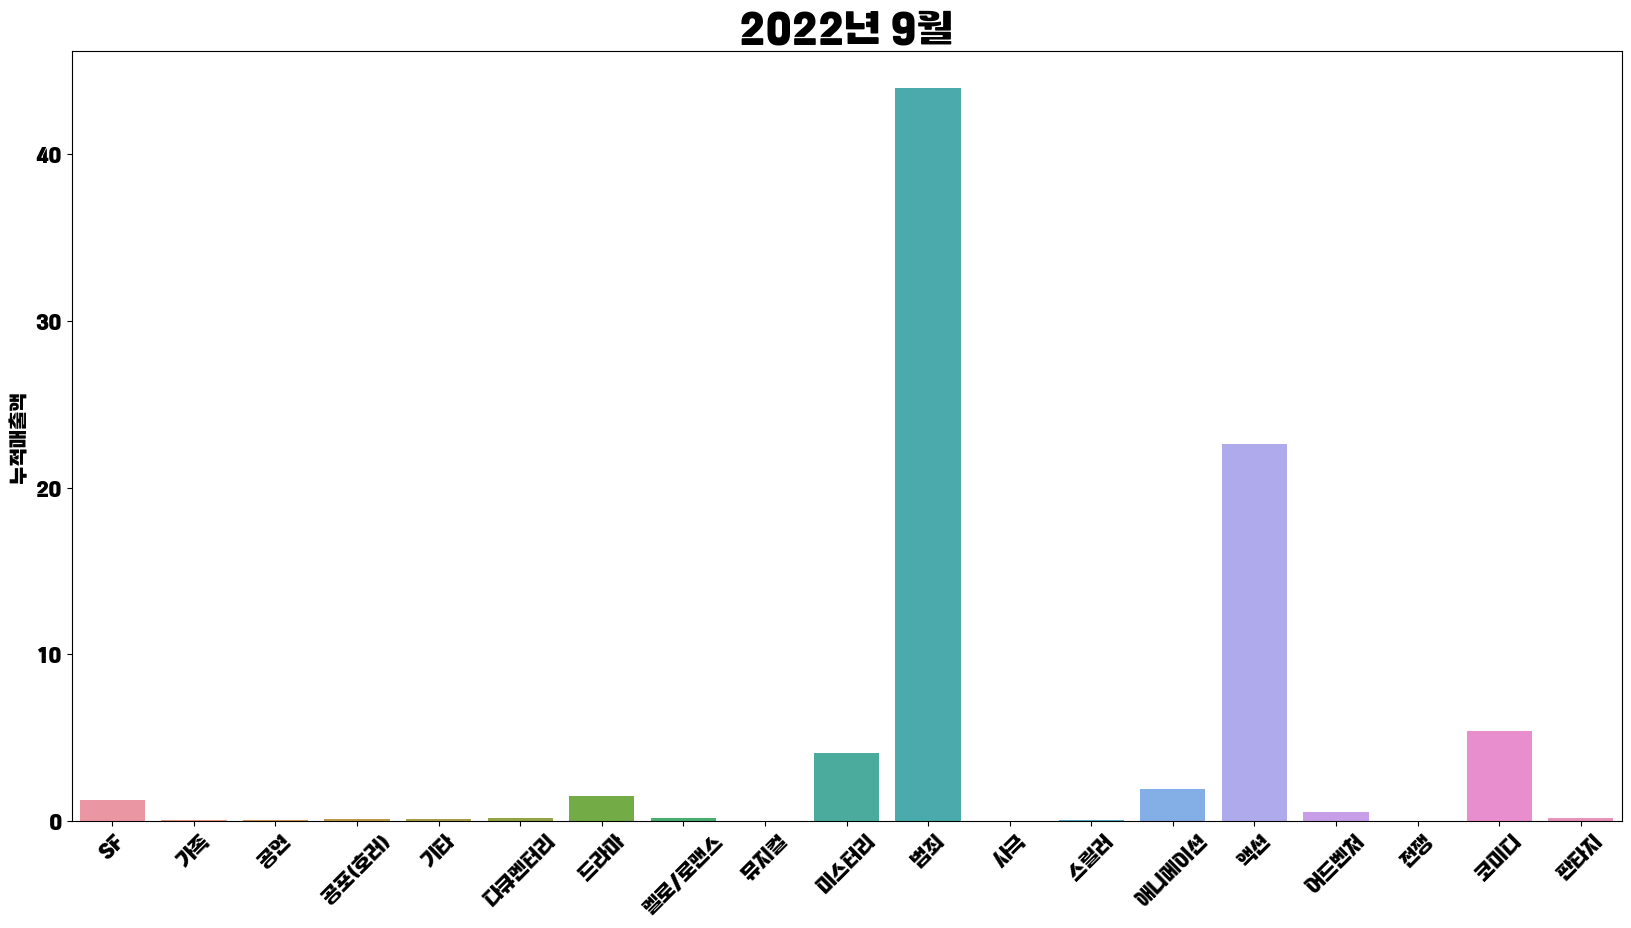

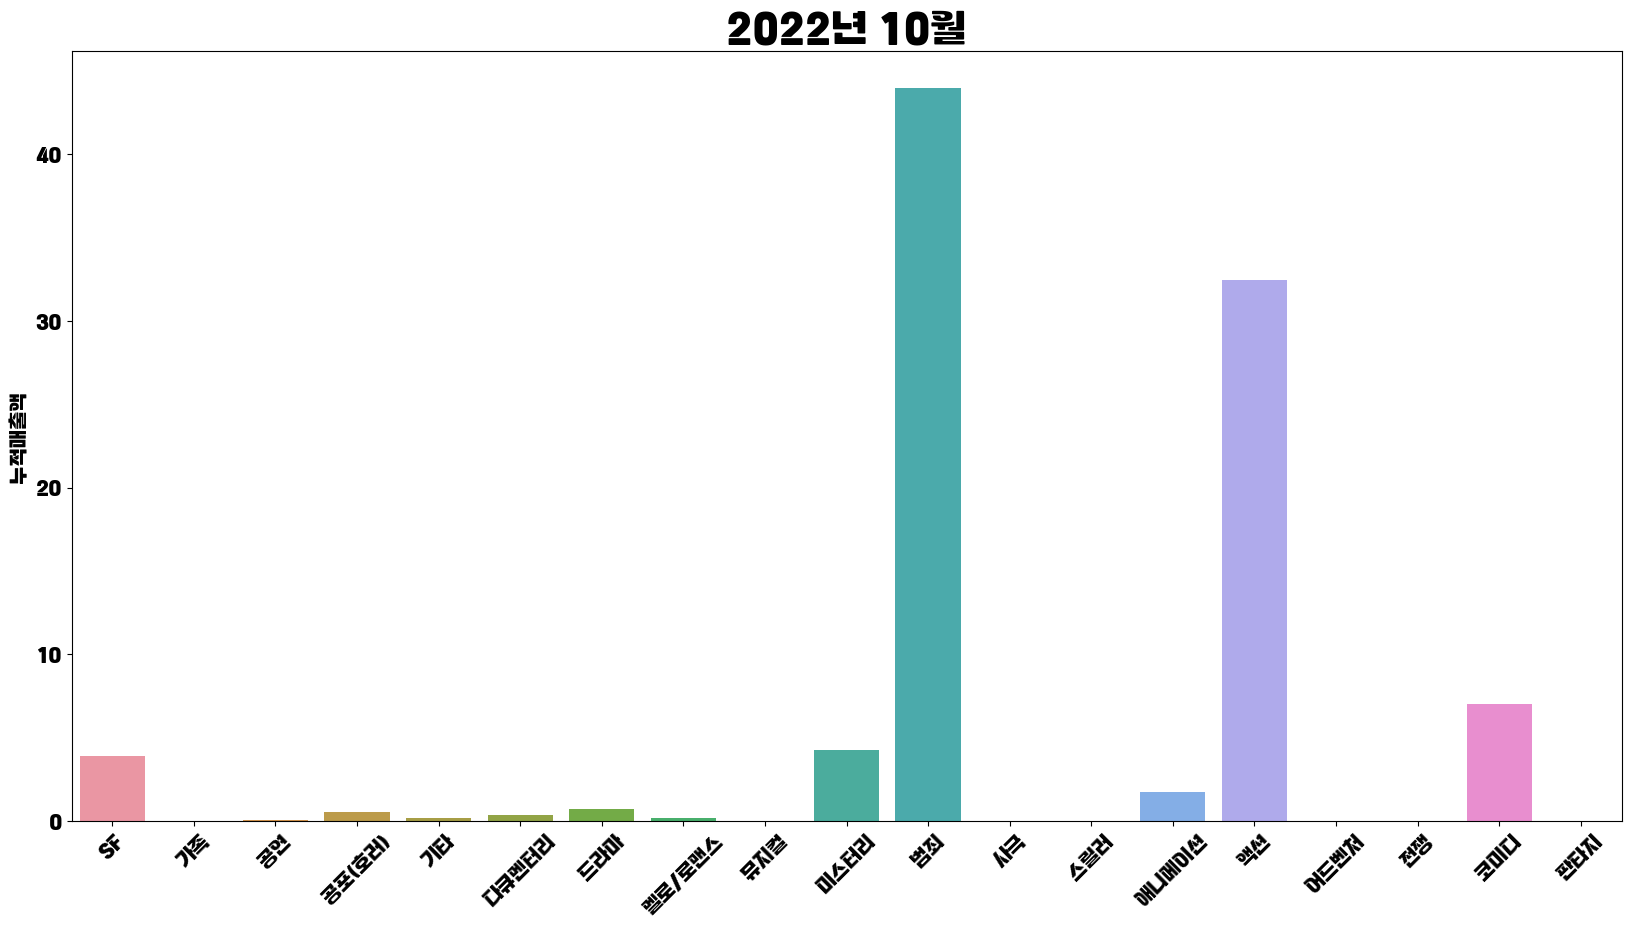

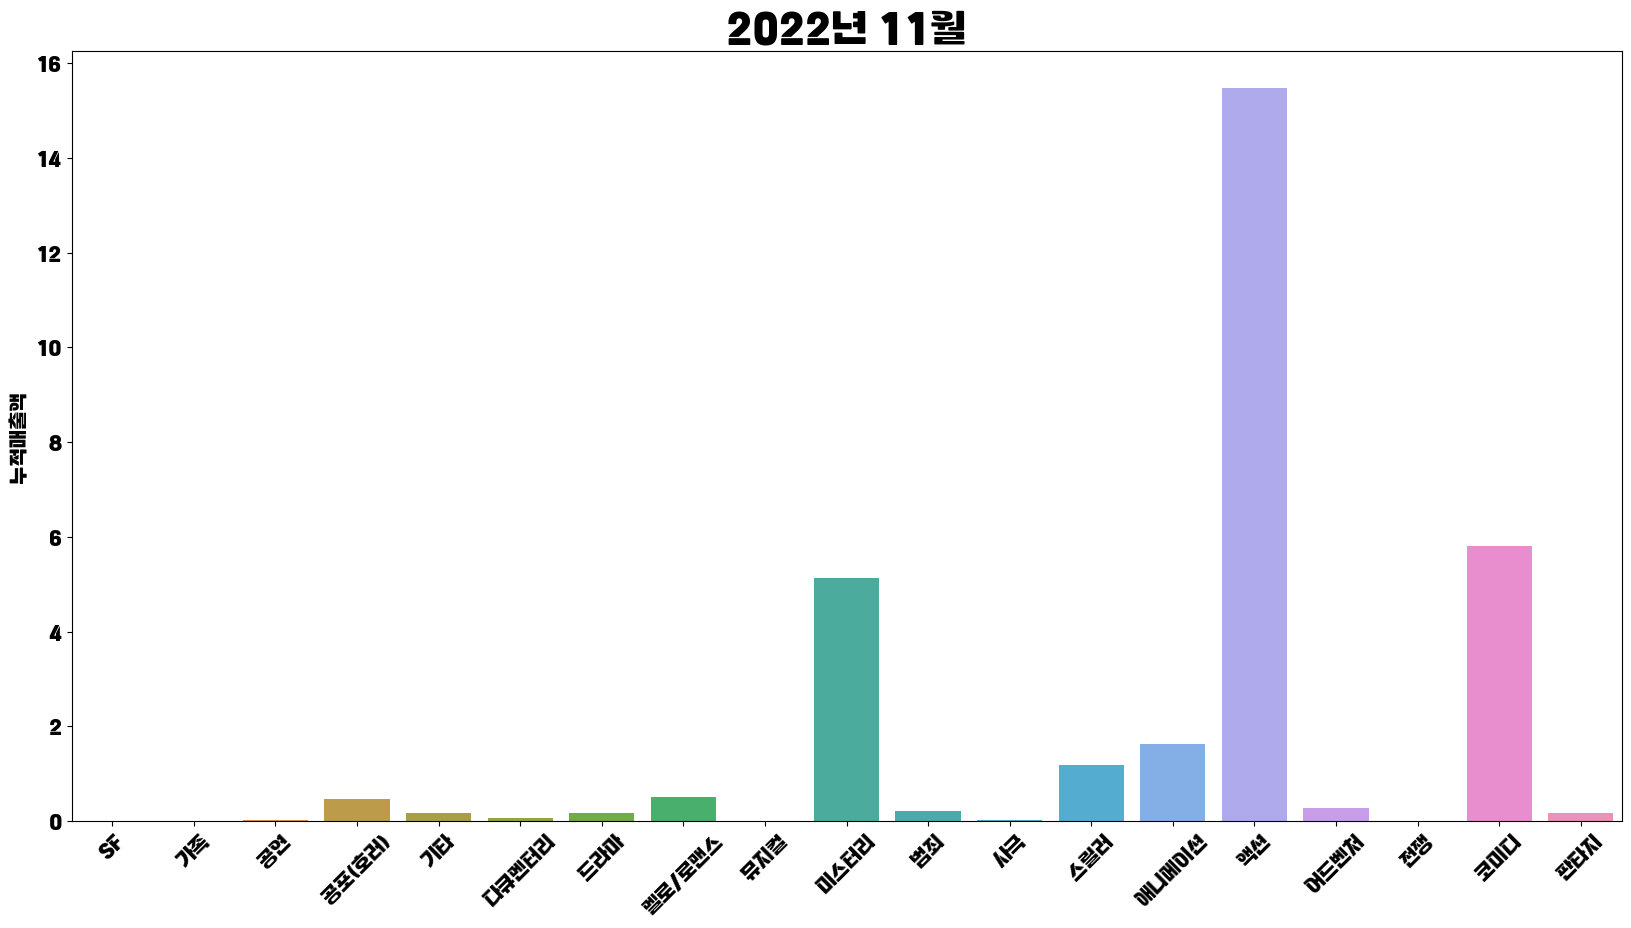

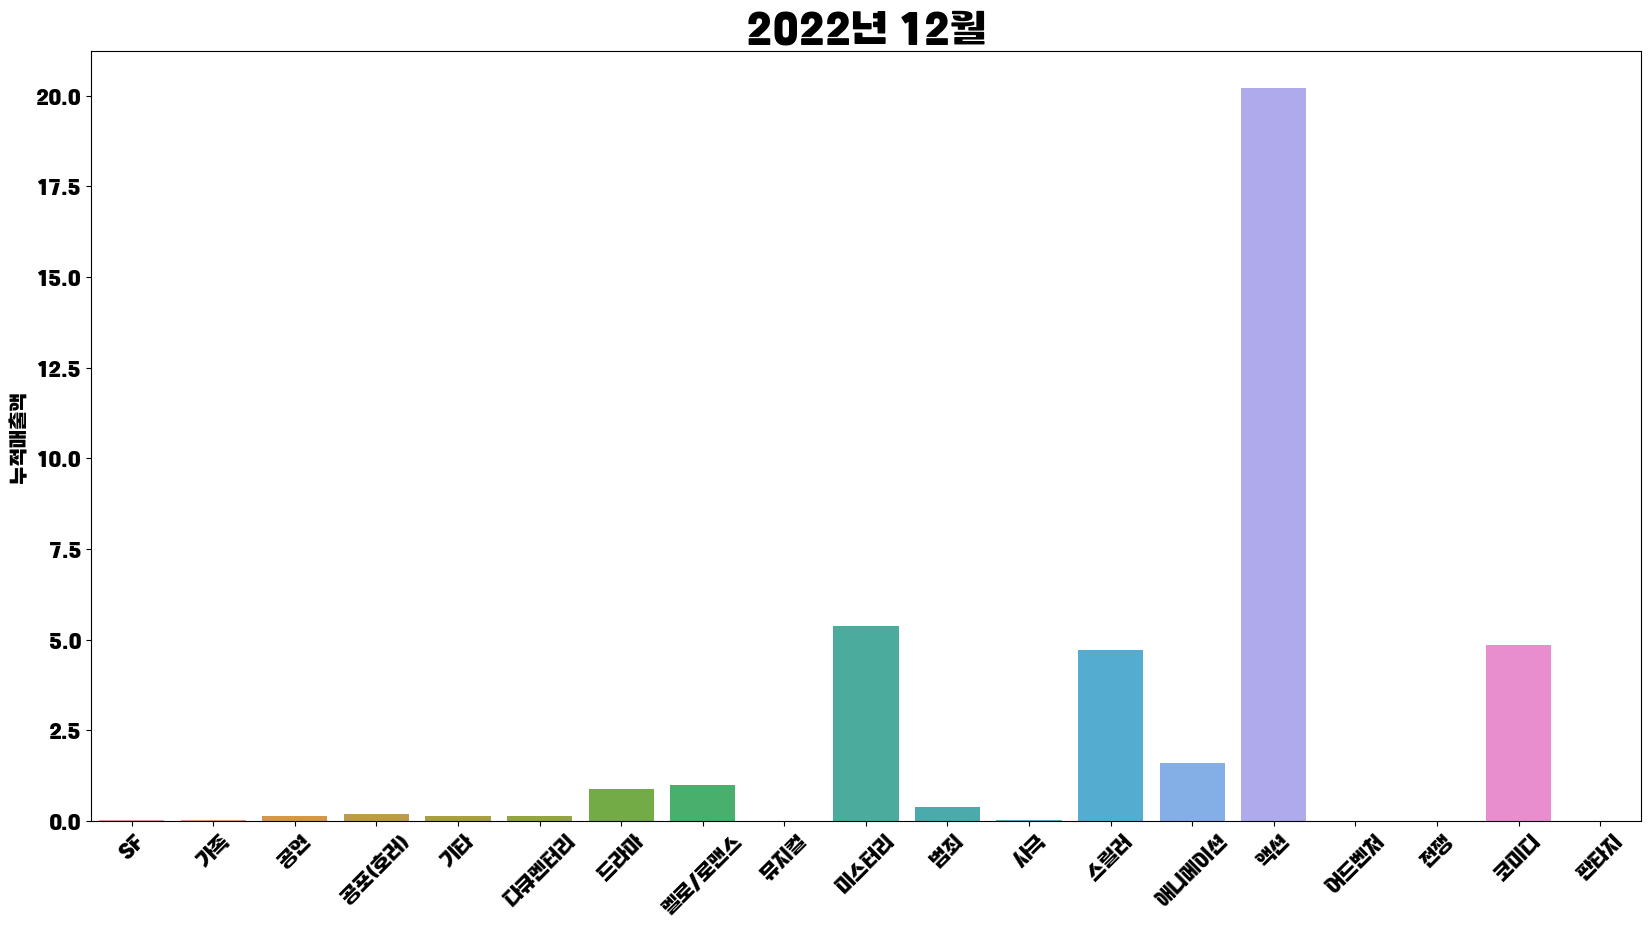

In [138]:
for i in range(12):
    fig=plt.figure(figsize=(20,10))
    ax1=fig.add_subplot(1,1,1)
    sns.barplot(x=genreList,y=mdf_genre_2022['누적매출액'][i*19:(i+1)*19],data=mdf_genre_2022)
    ax1.set_title('2022년 '+month[i],size=30)
    ax1.set_xticklabels(genreList,rotation=45)
    fig.savefig('2022년 '+month[i]+'.png')

---
### 월 별 범죄 장르의 매출액 순위
---

In [99]:
# 순위 df 생성
rank_2021=mdf_genre_2021.pivot_table(index='장르', columns='분석월', values='누적매출액', aggfunc='sum')
rank_2021=rank_2021.rank(ascending=False, method='min')

rank_2022=mdf_genre_2022.pivot_table(index='장르', columns='분석월', values='누적매출액', aggfunc='sum')
rank_2022=rank_2022.rank(ascending=False, method='min')

month_num=list(rank_2021.columns.astype(str).str[4:])
rank_2021.columns=month_num
rank_2021.loc['년']='2021년'

rank_2022.columns=month_num
rank_2022.loc['년']='2022년'

rank_=pd.concat([rank_2021,rank_2022],axis=1)

rank_=rank_.loc[['범죄','년']]
rank_=rank_.T

C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_9496\56838452.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18])
C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_9496\56838452.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels([0,2,4,6,8,10,12,14,16,18])


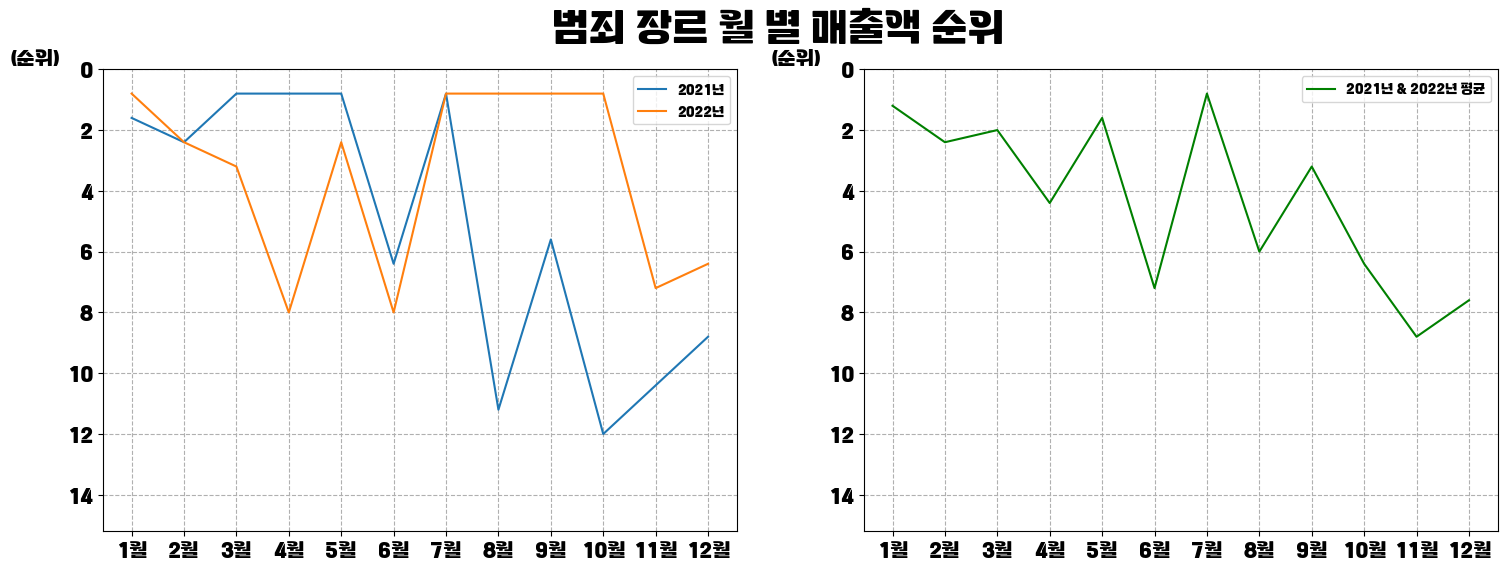

In [137]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
fig.suptitle('범죄 장르 월 별 매출액 순위', fontsize=30)


ax[0].plot(list(map(str,mdf_month_2022.index)),rank_2021.loc['범죄'])
ax[0].plot(list(map(str,mdf_month_2022.index)),rank_2022.loc['범죄'])
ax[0].legend(labels=['2021년','2022년'], fontsize=10)
ax[0].invert_yaxis()
ax[0].grid(True, linestyle='--', )
ax[0].set_ylabel('(순위)',loc='top',rotation=0)
ax[0].set_ylim(bottom=19,top=0)
ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18])

mdf_total_rank=(rank_2021.loc['범죄']+rank_2022.loc['범죄'])/2
ax[1].plot(list(map(str,mdf_month_2022.index)),mdf_total_rank, c='g')
ax[1].legend(labels=['2021년 & 2022년 평균'], fontsize=10)
ax[1].invert_yaxis()
ax[1].grid(True, linestyle='--', )
ax[1].set_ylabel('(순위)',loc='top',rotation=0)
ax[1].set_ylim(bottom=19,top=0)
ax[1].set_yticklabels([0,2,4,6,8,10,12,14,16,18])

fig.savefig('b.png',transparent=True)

---
### 월 별 개봉영화 수
---

In [101]:
month=[]
for a in range(12) : month.append(str(a+1)+'월')

mdf_count=mdf.groupby('분석월').count()
mdf_count_2021=mdf_count[:12]
mdf_count_2022=mdf_count[12:]

mdf_count_2021=mdf_count_2021.reset_index(drop=False)
mdf_count_2021['월']=month
mdf_count_2021=mdf_count_2021.set_index('월')

mdf_count_2022=mdf_count_2022.reset_index(drop=False)
mdf_count_2022['월']=month
mdf_count_2022=mdf_count_2022.set_index('월')

mark=mdf['장르']=='범죄'
mdf_count_crime=mdf[mark]
mdf_count_crime=mdf_count_crime.groupby('분석월').count()
mdf_count_crime.loc[202111]=0
mdf_count_crime.loc[202112]=0
mdf_count_crime.loc[202204]=0
mdf_count_crime.loc[202206]=0
mdf_count_crime.sort_index(inplace=True)

mdf_count_2021_crime=mdf_count_crime[:12]
mdf_count_2022_crime=mdf_count_crime[12:]

mdf_count_2021_crime=mdf_count_2021_crime.reset_index(drop=False)
mdf_count_2021_crime['월']=month
mdf_count_2021_crime=mdf_count_2021_crime.set_index('월')

mdf_count_2022_crime=mdf_count_2022_crime.reset_index(drop=False)
mdf_count_2022_crime['월']=month
mdf_count_2022_crime=mdf_count_2022_crime.set_index('월')

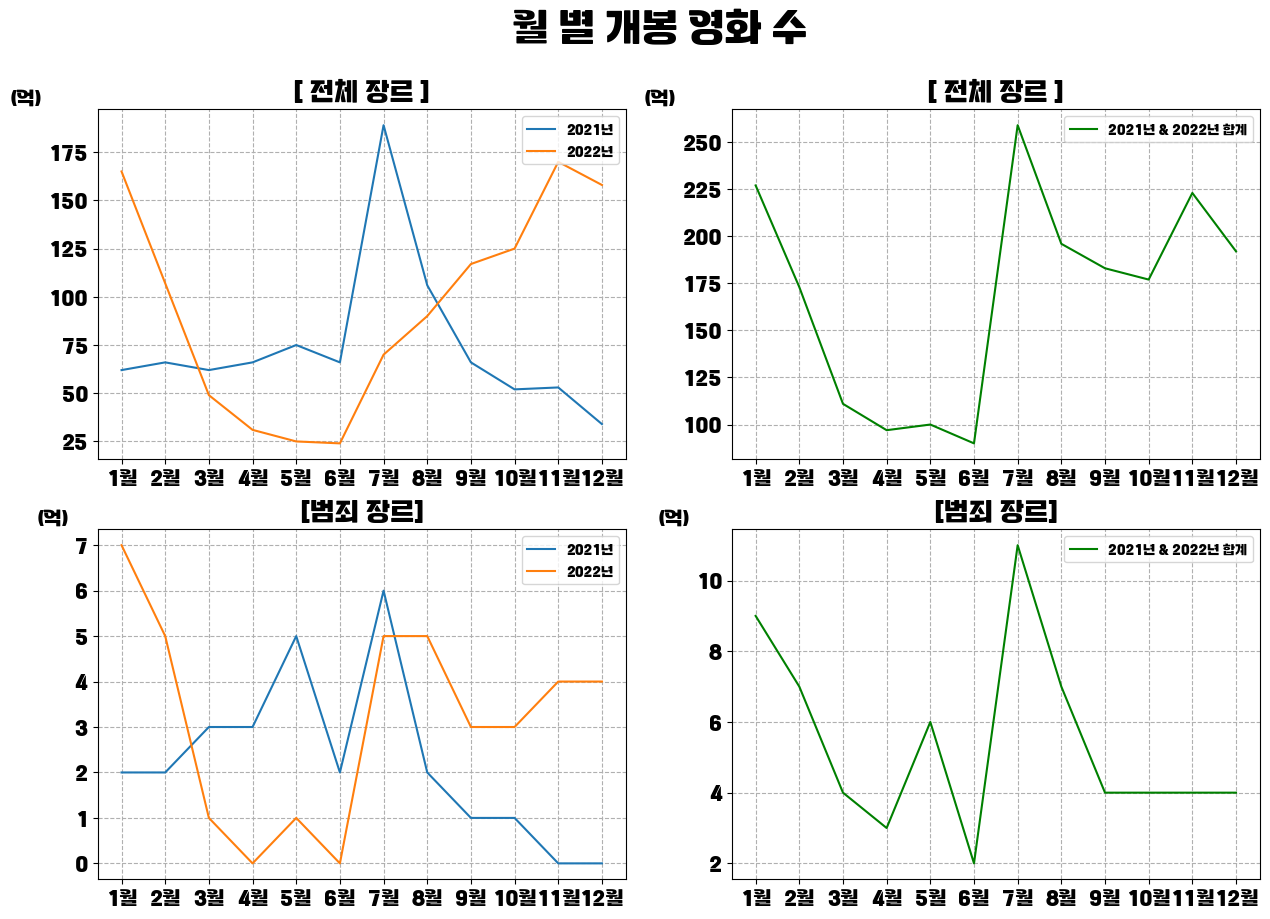

In [134]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('월 별 개봉 영화 수', fontsize=30)

# [전체 장르]
ax[0,0].plot(list(map(str,mdf_month_2021.index)),mdf_count_2021['영화명'])
ax[0,0].plot(list(map(str,mdf_month_2022.index)),mdf_count_2022['영화명'])
ax[0,0].legend(labels=['2021년','2022년'], fontsize=10, loc='upper right')
ax[0,0].set_title('[ 전체 장르 ]', fontsize=20)
ax[0,0].grid(True, linestyle='--', )
ax[0,0].set_ylabel('(억)',loc='top',rotation=0)

mdf_count_total=(mdf_count_2021['영화명'] + mdf_count_2022['영화명'])
ax[0,1].plot(list(map(str,mdf_month_2021.index)),mdf_count_total, c='g')
ax[0,1].legend(labels=['2021년 & 2022년 합계'], fontsize=10)
ax[0,1].set_title('[ 전체 장르 ]', fontsize=20)
ax[0,1].grid(True, linestyle='--', )
ax[0,1].set_ylabel('(억)',loc='top',rotation=0)

# [범죄 장르]
ax[1,0].plot(list(map(str,mdf_month_crime_2021.index)),mdf_count_2021_crime['영화명'])
ax[1,0].plot(list(map(str,mdf_month_crime_2022.index)),mdf_count_2022_crime['영화명'])
ax[1,0].legend(labels=['2021년','2022년'], fontsize=10)
ax[1,0].set_title('[범죄 장르]', fontsize=20)
ax[1,0].grid(True, linestyle='--', )
ax[1,0].set_ylabel('(억)',loc='top',rotation=0)

mdf_count_crime=(mdf_count_2021_crime['영화명'] + mdf_count_2022_crime['영화명'])
ax[1,1].plot(list(map(str,mdf_month_crime_2021.index)),mdf_count_crime, c='g')
ax[1,1].legend(labels=['2021년 & 2022년 합계'], fontsize=10)
ax[1,1].set_title('[범죄 장르]', fontsize=20)
ax[1,1].grid(True, linestyle='--', )
ax[1,1].set_ylabel('(억)',loc='top',rotation=0)

fig.savefig('c.png',transparent=True)

- 범죄 장르의 월 별 매출액 순위 분석 시 7월, 5월, 9월 순으로 높은 등수가 확인됨
- 월 별 개봉 영화 수 확인 시 전체 장르, 범죄 장르 모두 7월 개봉작이 가장 많았음
- 7월에 다양한 장르의 많은 영화가 개봉되었음에도 범죄 영화의 매출액이 높게 나타난 것으로 보아, 7월에 관객들이 많은 영화 중 범죄 영화를 많이 찾고있으며 흥행가능성이 높다는 것으로 추정.